# BLENDHUNTER RESULTS
---

<br>
Comparison of BlendHunter's results with respect to the variation of noise standard deviation on simulated images.
The results were retrieved after a single run of the Top Model for each value of $\sigma_{noise}$.
<br>

## Contents
---

1. [DATA PREPARATION](#1-DATA-PREPARATION)
1. [SATISTICS OF THE MODEL](#2-STATISTICS-OF-THE-MODEL)
    1. [Total Errors](#NUMBER-OF-ERRORS-ACCORDING-TO-$\sigma_{noise}$-VALUE)
    1. [Missed Blends](#NUMBER-OF-FALSE-NEGATIVES-(MISSED-BLENDS))
    1. [Mistaken for Blends](#NUMBER-OF-FALSE-POSITIVES-(MISTAKEN-FOR-BLENDS))
    1. [Overlapping Objects](#NUMBER-OF-OVERLAPPING-OBJECTS)
    1. [Separated Objects](#NUMBER-OF-SEPARATED-OBJECTS)
1. [RESULTS AND VISUALISATION](#3-RESULTS-AND-PLOTS)
    1. [Errors and Distance between Objects](#ERRORS-AND-DISTANCE-BETWEEN-OBJECTS)
    1. [Errors and PSF (fwhm)](#ERRORS-AND-PSF-(fwhm))
    1. [Errors and SNR of the Central Object](#ERRORS-AND-SNR-OF-THE-CENTRAL-OBJECT-(-$\alpha$-))
    1. [Errors and SNR of the Second Object](#ERRORS-AND-SNR-OF-SECOND-OBJECT-(-$\beta$-))
    1. [Errors and PSI ratio(SNR_ALPHA / SNR_BETA)](#ERRORS-AND-PSI-RATIO-(SNR_$\alpha$/SNR_$\beta$))
    1. [Training and Validation Accuracy](#TRAINING-AND-VALIDATION-ACCURACY)
    

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import galsim

# 1 DATA PREPARATION
---

#### PATHS

In [55]:
ipath = '/Users/alacan/Documents/Cosmostat/Codes/BlendHunter'
input_path0 = ipath+'/bh/BlendHunterData/test/test'
input_path5 = ipath+'/bh_5/BlendHunterData/test/test'
input_path14 = ipath+'/bh_14/BlendHunterData/test/test'
input_path18 = ipath+'/bh_18/BlendHunterData/test/test'
input_path22 = ipath+'/bh_22/BlendHunterData/test/test'
input_path26 = ipath+'/bh_26_2/BlendHunterData/test/test'
input_path35 = ipath+'/bh_35/BlendHunterData/test/test'
input_path40 = ipath+'/bh_40/BlendHunterData/test/test'

#### TRUE LABELS

In [56]:
#True labels
labels = np.load(input_path0+'/labels.npy', allow_pickle=True)

#### PREDICTED LABELS

In [57]:
#Predicted labels
pred_top0 = np.load(input_path0+'/pred_top_tune.npy', allow_pickle=True)
pred_top5 = np.load(input_path5+'/pred_top_tune.npy', allow_pickle=True)
pred_top14 = np.load(input_path14+'/pred_top_tune.npy', allow_pickle=True)
pred_top18 = np.load(input_path18+'/pred_top_tune.npy', allow_pickle=True)
#pred_top22 = np.load(input_path22+'/pred_top.npy', allow_pickle=True)
pred_top26 = np.load(input_path26+'/pred_top.npy', allow_pickle=True)
pred_top35 = np.load(input_path35+'/pred_top_tune.npy', allow_pickle=True)
pred_top40 = np.load(input_path40+'/pred_top_tune.npy', allow_pickle=True)

In [58]:
#Reshape predicted labels array
preds0 = np.array([pred_top0])
preds5 = np.array([pred_top5])
preds14 = np.array([pred_top14])
preds18 = np.array([pred_top18])
#preds22 = np.array([pred_top22])
preds26 = np.array([pred_top26])
preds35 = np.array([pred_top35])
preds40 = np.array([pred_top40])

#### DATAFRAME

In [59]:
#Concatenate arrays
results_array =np.concatenate((labels.transpose(), preds0.transpose(), preds5.transpose(), preds14.transpose(), preds18.transpose()
                              , preds26.transpose(), preds35.transpose(), preds40.transpose()),axis=1)

# Create a DataFrame object
Results_top = pd.DataFrame(results_array, columns=['Labels', 'Preds0', 'Preds5', 'Preds14', 'Preds18', 'Preds26', 'Preds35', 'Preds40'])
print('The shape of our dataframe is '+str(Results_top.shape))

The shape of our dataframe is (8000, 8)


In [60]:
results0 = np.concatenate((labels.transpose(), preds0.transpose()), axis=1)
results_0= pd.DataFrame(results0, columns =['Labels', 'Preds0'])

### PSF (`fwhm`)

In [61]:
#FWHM extracted from test images
fwhm = np.reshape(np.load(ipath+"/bh_5/test_psf.npy", allow_pickle=True), (8000, 1))

# Adding the fwhm columns
Results_top['fwhm'] = pd.DataFrame(fwhm)

### SHIFT PARAMETERS (`x`and `y`)

In [62]:
#X parameter extracted from test images
param_x = np.load(ipath+"/bh_5/test_param_x.npy", allow_pickle=True)

#Y parameter extracted from test images
param_y = np.load(ipath+"/bh_5/test_param_y.npy", allow_pickle=True)

# Add 2 columns to the dataframe 
Results_top['param_x']=pd.DataFrame(param_x)
Results_top['param_y']=pd.DataFrame(param_y)

### CALCULATION OF DISTANCES BETWEEN OBJECTS

In [63]:
#Adding a new column 'Distance' which corresponds to the sqrt of (x² + y²)
Results_top['Distance']= pd.DataFrame(np.sqrt(Results_top['param_x']**2 + Results_top['param_y']**2))

In [64]:
Results_top.tail()

,Labels,Preds0,Preds5,Preds14,Preds18,Preds26,Preds35,Preds40,fwhm,param_x,param_y,Distance
7995,not_blended,not_blended,not_blended,not_blended,not_blended,blended,not_blended,not_blended,0.664813,NaN,NaN,NaN
7996,not_blended,not_blended,not_blended,not_blended,not_blended,blended,blended,not_blended,0.699730,NaN,NaN,NaN
7997,not_blended,not_blended,not_blended,not_blended,blended,not_blended,not_blended,not_blended,0.641284,NaN,NaN,NaN
7998,not_blended,not_blended,not_blended,not_blended,not_blended,not_blended,not_blended,not_blended,0.646823,NaN,NaN,NaN
7999,not_blended,not_blended,not_blended,not_blended,not_blended,not_blended,blended,not_blended,0.691658,NaN,NaN,NaN


### SEGMENTATION MAP AND IMAGES

In [65]:
#Importing segmentation maps (blended and not blended)
sm = np.load(ipath+"/bh_5/test_seg_map.npy", allow_pickle=True)
#sm_nb = np.load(input_path+"/test_seg_map_nb.npy", allow_pickle=True)

#sm_test = np.vstack((sm, sm_nb))
#len(sm_test)

#Importing pixels values
img5 = np.load(ipath+"/bh_5/gal_im_blended.npy", allow_pickle=True)
img14 = np.load(ipath+"/bh_14/gal_im_blended.npy", allow_pickle=True)
img18 = np.load(ipath+"/bh_18/gal_im_blended.npy", allow_pickle=True)
img26 = np.load(ipath+"/bh_26/gal_im_blended.npy", allow_pickle=True)
img35 = np.load(ipath+"/bh_35/gal_im_blended.npy", allow_pickle=True)
img40 = np.load(ipath+"/bh_40/gal_im_blended.npy", allow_pickle=True)

### SEPARATION OF OVERLAPPING AND SEPARATED OBJECTS

In [66]:
#Create masks of separated objects or overlapping objects
def overlap_objects(arr):
    if np.sum(arr==3)>=1:
        return arr
    else:
        return np.zeros((51,51))
def separated_objects(arr):
     if np.sum(arr==3)==0:
        return arr
     else:
        return np.zeros((51,51))
def remove_none_elements(list):
     return [e for e in list if(pd.notnull(np.all(e)))]
    
#Mask for overlaps    
overlaps_mask = np.array([overlap_objects(sm[i]) for i in range(len(sm))])
#Mask for separated objects
separated_mask = np.array([separated_objects(sm[i]) for i in range(len(sm))])

print('VERIFICATION ~ There are {} blended objects in total.'.format((len(overlaps_mask)+len(separated_mask))/2))

VERIFICATION ~ There are 4000.0 blended objects in total.


### $\alpha$ and $\beta$ objects signal for blended images

#### TOTAL BLENDED OBJECTS

In [67]:
def alpha_signal(images=None, mask=None):
    return np.array([np.sum(images[i][mask[i] == 1] ** 2) for i in range(len(images))])

def beta_signal(images=None, mask=None):
     return np.array([np.sum(images[i][mask[i] == 2] ** 2) for i in range(len(images))])

In [68]:
# Calculate the sum of squares of the masked elements
# ALPHA and BETA signal for blended elements
AB5 = alpha_signal(images=img5, mask= sm).reshape(4000,1)
B5 = beta_signal(images=img5, mask= sm).reshape(4000,1)
"""#################"""
AB14 = alpha_signal(images=img14, mask= sm).reshape(4000,1)
B14 = beta_signal(images=img14, mask= sm).reshape(4000,1)
"""#################"""
AB18 = alpha_signal(images=img18, mask= sm).reshape(4000,1)
B18 = beta_signal(images=img18, mask= sm).reshape(4000,1)
"""#################"""
AB26 = alpha_signal(images=img26, mask= sm).reshape(4000,1)
B26 = beta_signal(images=img26, mask= sm).reshape(4000,1)
"""#################"""
AB35 = alpha_signal(images=img35, mask= sm).reshape(4000,1)
B35 = beta_signal(images=img35, mask= sm).reshape(4000,1)
"""#################"""
AB40 = alpha_signal(images=img40, mask= sm).reshape(4000,1)
B40 = beta_signal(images=img40, mask= sm).reshape(4000,1)

#### TOTAL SEPARATED OBJECTS

In [69]:
# Calculate the sum of squares of the masked elements for separated objects
# ALPHA and BETA signal for separated elements
AS5 = alpha_signal(images=img5, mask= separated_mask).reshape(4000,1)
BS5 = beta_signal(images=img5, mask= separated_mask).reshape(4000,1)
"""#################"""
AS14 = alpha_signal(images=img14, mask= separated_mask).reshape(4000,1)
BS14 = beta_signal(images=img14, mask= separated_mask).reshape(4000,1)
"""#################"""
AS18 = alpha_signal(images=img18, mask= separated_mask).reshape(4000,1)
BS18 = beta_signal(images=img18, mask= separated_mask).reshape(4000,1)
"""#################"""
AS26 = alpha_signal(images=img26, mask= separated_mask).reshape(4000,1)
BS26 = beta_signal(images=img26, mask= separated_mask).reshape(4000,1)
"""#################"""
AS35 = alpha_signal(images=img35, mask= separated_mask).reshape(4000,1)
BS35 = beta_signal(images=img35, mask= separated_mask).reshape(4000,1)
"""#################"""
AS40 = alpha_signal(images=img40, mask= separated_mask).reshape(4000,1)
BS40 = beta_signal(images=img40, mask= separated_mask).reshape(4000,1)

#### TOTAL OVERLAPPING OBJECTS

In [70]:
# ALPHA and BETA signal for separated elements
AO5 = alpha_signal(images=img5, mask= overlaps_mask).reshape(4000,1)
BO5 = beta_signal(images=img5, mask= overlaps_mask).reshape(4000,1)
"""#################"""
AO14 = alpha_signal(images=img14, mask= overlaps_mask).reshape(4000,1)
BO14 = beta_signal(images=img14, mask= overlaps_mask).reshape(4000,1)
"""#################"""
AO18 = alpha_signal(images=img18, mask= overlaps_mask).reshape(4000,1)
BO18 = beta_signal(images=img18, mask= overlaps_mask).reshape(4000,1)
"""#################"""
AO26 = alpha_signal(images=img26, mask= overlaps_mask).reshape(4000,1)
BO26 = beta_signal(images=img26, mask= overlaps_mask).reshape(4000,1)
"""#################"""
AO35 = alpha_signal(images=img35, mask= overlaps_mask).reshape(4000,1)
BO35 = beta_signal(images=img35, mask= overlaps_mask).reshape(4000,1)
"""#################"""
AO40 = alpha_signal(images=img40, mask= overlaps_mask).reshape(4000,1)
BO40 = beta_signal(images=img40, mask= overlaps_mask).reshape(4000,1)

### CALCULATION OF THE SNR

#### NOISE STD DEVIATIONS ($\sigma$)
We tested the model with the following values for $\sigma_{noise}$ : `5.0`, `14.0`, `18.0`, `22.0`, `26.0`, `35.0`, `40.0`.

In [71]:
# Calculate the SNR for a given sigma
sigma0 = 0.0
sigma5 = 5.0
sigma14 = 14.0
sigma18 = 18.0
sigma22 = 22.0
sigma26 = 26.0
sigma35 = 35.0
sigma40 = 40.0

In [72]:
def snr_alpha(alpha=None, sigma=None):
    return np.array([np.sqrt(alpha[i] / sigma**2) for i in range(len(alpha))])

def snr_beta(beta=None, sigma=None):
    return np.array([np.sqrt(beta[i] / sigma**2) for i in range(len(beta))])

#### TOTAL BLENDED OBJECTS

In [73]:
# SNR for total blended objects
snrA5 = snr_alpha(alpha=AB5, sigma=sigma5)
snrA14 = snr_alpha(alpha=AB14, sigma=sigma14)
snrA18 = snr_alpha(alpha=AB18, sigma=sigma18)
snrA26 = snr_alpha(alpha=AB26, sigma=sigma26)
snrA35 = snr_alpha(alpha=AB35, sigma=sigma35)
snrA40 = snr_alpha(alpha=AB40, sigma=sigma40)

snrB5 = snr_beta(beta=B5, sigma=sigma5)
snrB14 = snr_beta(beta=B14, sigma=sigma14)
snrB18 = snr_beta(beta=B18, sigma=sigma18)
snrB26 = snr_beta(beta=B26, sigma=sigma26)
snrB35 = snr_beta(beta=B35, sigma=sigma35)
snrB40 = snr_beta(beta=B40, sigma=sigma40)

#Adding columns to dataframe
Results_top['snrA5'] = pd.DataFrame(snrA5)
Results_top['snrB5'] = pd.DataFrame(snrB5)
Results_top['snrA14'] = pd.DataFrame(snrA14)
Results_top['snrB14'] = pd.DataFrame(snrB14)
Results_top['snrA18'] = pd.DataFrame(snrA18)
Results_top['snrB18'] = pd.DataFrame(snrB18)
Results_top['snrA26'] = pd.DataFrame(snrA26)
Results_top['snrB26'] = pd.DataFrame(snrB26)
Results_top['snrA35'] = pd.DataFrame(snrA35)
Results_top['snrB35'] = pd.DataFrame(snrB35)
Results_top['snrA40'] = pd.DataFrame(snrA40)
Results_top['snrB40'] = pd.DataFrame(snrB40)

#### TOTAL SEPARATED OBJECTS

In [74]:
snr_a_S5 = [np.sqrt(alpha_S5[i] / sigma5**2) for i in range(len(alpha_S5))]
snr_b_S5 = [np.sqrt(beta_S5[i] / sigma5**2) for i in range(len(beta_S5))]

snr_a_S14 = [np.sqrt(alpha_S14[i] / sigma14**2) for i in range(len(alpha_S14))]
snr_b_S14 = [np.sqrt(beta_S14[i] / sigma14**2) for i in range(len(beta_S14))]

snr_a_S18 = [np.sqrt(alpha_S18[i] / sigma18**2) for i in range(len(alpha_S18))]
snr_b_S18 = [np.sqrt(beta_S18[i] / sigma18**2) for i in range(len(beta_S18))]

snr_a_S26 = [np.sqrt(alpha_S26[i] / sigma26**2) for i in range(len(alpha_S26))]
snr_b_S26 = [np.sqrt(beta_S26[i] / sigma26**2) for i in range(len(beta_S26))]

snr_a_S35 = [np.sqrt(alpha_S35[i] / sigma35**2) for i in range(len(alpha_S35))]
snr_b_S35 = [np.sqrt(beta_S35[i] / sigma35**2) for i in range(len(beta_S35))]

snr_a_S40 = [np.sqrt(alpha_S40[i] / sigma40**2) for i in range(len(alpha_S40))]
snr_b_S40 = [np.sqrt(beta_S40[i] / sigma40**2) for i in range(len(beta_S40))]


#Adding columns to dataframe
Results_top['snr_a_S5'] = pd.DataFrame(snr_a_S5)
Results_top['snr_b_S5'] = pd.DataFrame(snr_b_S5)
Results_top['snr_a_S14'] = pd.DataFrame(snr_a_S14)
Results_top['snr_b_S14'] = pd.DataFrame(snr_b_S14)
Results_top['snr_a_S18'] = pd.DataFrame(snr_a_S18)
Results_top['snr_b_S18'] = pd.DataFrame(snr_b_S18)
Results_top['snr_a_S26'] = pd.DataFrame(snr_a_S26)
Results_top['snr_b_S26'] = pd.DataFrame(snr_b_S26)
Results_top['snr_a_S35'] = pd.DataFrame(snr_a_S35)
Results_top['snr_b_S35'] = pd.DataFrame(snr_b_S35)
Results_top['snr_a_S40'] = pd.DataFrame(snr_a_S40)
Results_top['snr_b_S40'] = pd.DataFrame(snr_b_S40)

NameError: name 'alpha_S5' is not defined

#### TOTAL OVERLAPPING OBJECTS

In [303]:
snr_a_O5 = [np.sqrt(alpha_O5[i] / sigma5**2) for i in range(len(alpha_O5))]
snr_b_O5 = [np.sqrt(beta_O5[i] / sigma5**2) for i in range(len(beta_O5))]

snr_a_O14 = [np.sqrt(alpha_O14[i] / sigma14**2) for i in range(len(alpha_O14))]
snr_b_O14 = [np.sqrt(beta_O14[i] / sigma14**2) for i in range(len(beta_O14))]

snr_a_O18 = [np.sqrt(alpha_O18[i] / sigma18**2) for i in range(len(alpha_O18))]
snr_b_O18 = [np.sqrt(beta_O18[i] / sigma18**2) for i in range(len(beta_O18))]

snr_a_O26 = [np.sqrt(alpha_O26[i] / sigma26**2) for i in range(len(alpha_O26))]
snr_b_O26 = [np.sqrt(beta_O26[i] / sigma26**2) for i in range(len(beta_O26))]

snr_a_O35 = [np.sqrt(alpha_O35[i] / sigma35**2) for i in range(len(alpha_O35))]
snr_b_O35 = [np.sqrt(beta_O35[i] / sigma35**2) for i in range(len(beta_O35))]

snr_a_O40 = [np.sqrt(alpha_O40[i] / sigma40**2) for i in range(len(alpha_O40))]
snr_b_O40 = [np.sqrt(beta_O40[i] / sigma40**2) for i in range(len(beta_O40))]

#Adding columns to dataframe
Results_top['snr_a_O5'] = pd.DataFrame(snr_a_O5)
Results_top['snr_b_O5'] = pd.DataFrame(snr_b_O5)
Results_top['snr_a_O14'] = pd.DataFrame(snr_a_O14)
Results_top['snr_b_O14'] = pd.DataFrame(snr_b_O14)
Results_top['snr_a_O18'] = pd.DataFrame(snr_a_O18)
Results_top['snr_b_O18'] = pd.DataFrame(snr_b_O18)
Results_top['snr_a_O26'] = pd.DataFrame(snr_a_O26)
Results_top['snr_b_O26'] = pd.DataFrame(snr_b_O26)
Results_top['snr_a_O35'] = pd.DataFrame(snr_a_O35)
Results_top['snr_b_O35'] = pd.DataFrame(snr_b_O35)
Results_top['snr_a_O40'] = pd.DataFrame(snr_a_O40)
Results_top['snr_b_O40'] = pd.DataFrame(snr_b_O40)

### CALCULATION OF SNR RATIO ($\psi$)

In [76]:
#Calculate ratio 
def psi_ratio(snr_A=None, snr_B=None):
    return np.array([snr_A[i]/snr_B[i] for i in range(len(B5))])

In [77]:
psi5 = psi_ratio(snr_A=snrA5, snr_B=snrB5)
psi14 = psi_ratio(snr_A=snrA14, snr_B=snrB14)
psi18 = psi_ratio(snr_A=snrA18, snr_B=snrB18)
psi26 = psi_ratio(snr_A=snrA26, snr_B=snrB26)
psi35 = psi_ratio(snr_A=snrA35, snr_B=snrB35)
psi40 = psi_ratio(snr_A=snrA40, snr_B=snrB40)

#Add psi columns
Results_top['psi5'] = pd.DataFrame(psi5)
Results_top['psi14'] = pd.DataFrame(psi14)
Results_top['psi18'] = pd.DataFrame(psi18)
Results_top['psi26'] = pd.DataFrame(psi26)
Results_top['psi35'] = pd.DataFrame(psi35)
Results_top['psi40'] = pd.DataFrame(psi40)

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
#Drop NaN because issue when plotting otherwise
Results_blended = Results_top.dropna(axis=0, how='any')

## EXPORT DATASETS TO CSV

In [81]:
def create_df(dataframe=None,):
    dataframe['Image']=pd.DataFrame(np.arange(72000, 80000))
    dataframe['fwmh']=pd.DataFrame(fwhm)
    dataframe['param_x']=pd.DataFrame(param_x)
    dataframe['param_y']=pd.DataFrame(param_y)
    dataframe['Distance']= pd.DataFrame(np.sqrt(Results_top['param_x']**2 + Results_top['param_y']**2))
    
    
    return dataframe

results_0 = create_df(dataframe=results_0)

## SEXTRACTOR RESULTS

In [81]:
sep_path='/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/sep_results'
sext5 = np.load(sep_path+'/flags_5.npy', allow_pickle=True)
sext14 = np.load(sep_path+'/flags_14.npy', allow_pickle=True)
sext18 = np.load(sep_path+'/flags_18.npy', allow_pickle=True)
sext26 = np.load(sep_path+'/flags_26.npy', allow_pickle=True)
sext35 = np.load(sep_path+'/flags_35.npy', allow_pickle=True)
sext40 = np.load(sep_path+'/flags_40.npy', allow_pickle=True)

arrays = [sext5, sext14, sext18, sext26, sext35, sext40]
flags= np.array([i.reshape(1,40000).transpose() for i in arrays])

def create_dataframe(results_list):

        flags= np.array([i.reshape(1,40000).transpose() for i in results_list])
        cols = np.concatenate((flags[0], flags[1], flags[2], flags[3], flags[4], flags[5]), axis = 1)
        return pd.DataFrame(cols, columns = ['flags5', 'flags14', 'flags18', 'flags26', 'flags35', 'flags40'])
    

Results_sext = create_dataframe(arrays)

blended_images = np.load(ipath+'/axel_sims/larger_dataset/blended/gal_obj_0.npy', allow_pickle=True)

#Getting the shift parameters
param_x_total = np.array([blended_images[val]['blend_param']['dx'] for val in range(blended_images.size)])
param_y_total = np.array([blended_images[val]['blend_param']['dy'] for val in range(blended_images.size)])

#Getting the fwhm (PSF) values
fwhm_total = np.array([blended_images[val]['PSF']['fwhm'] for val in range(blended_images.size)])
#Add column to datafram
Results_sext['fwhm'] = pd.DataFrame(fwhm_total)

# Add 2 columns to the dataframe 
Results_sext['param_x_total']=pd.DataFrame(param_x_total)
Results_sext['param_y_total']=pd.DataFrame(param_y_total)

#Adding a new column 'Distance' which corresponds to the sqrt of (x² + y²)
Results_sext['Distance']= pd.DataFrame(np.sqrt(Results_sext['param_x_total']**2 + Results_sext['param_y_total']**2))

#Errors to dataframe

def nb_errors_sextractor(sigma_value=None, dataframe=None):
    
    nb = dataframe.apply(lambda x: True if x['flags{}'.format(sigma_value)] == 0 or x['flags{}'.format(sigma_value)] == 16 else False , axis=1)
    
    return pd.merge(pd.DataFrame(nb[nb ==True]), dataframe, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)

errors_sext5 = nb_errors_sextractor(sigma_value=5, dataframe=Results_sext)
errors_sext14 = nb_errors_sextractor(sigma_value=14, dataframe=Results_sext)
errors_sext18 = nb_errors_sextractor(sigma_value=18, dataframe=Results_sext)
errors_sext26 = nb_errors_sextractor(sigma_value=26, dataframe=Results_sext)
errors_sext35 = nb_errors_sextractor(sigma_value=35, dataframe=Results_sext)
errors_sext40 = nb_errors_sextractor(sigma_value=40, dataframe=Results_sext)

# 2 STATISTICS OF THE MODEL
---

## NUMBER OF `ERRORS` ACCORDING TO $\sigma_{noise}$ VALUE

In [90]:
# Apply function (true different from predicted)
ER0 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds0'] else False , axis=1)
ER5 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds5'] else False , axis=1)
ER14 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds14'] else False , axis=1)
ER18 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds18'] else False , axis=1)
ER26 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds26'] else False , axis=1)
ER35 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds35'] else False , axis=1)
ER40 = Results_top.apply(lambda x: True if x['Labels'] != x['Preds40'] else False , axis=1)

# Count number of True in series
print('There are {} errors in total when sigma_noise is null.'.format(len(ER0[ER0 == True].index)))
print('There are {} errors in total when sigma_noise = 5.0.'.format(len(ER5[ER5 == True].index)))
print('There are {} errors in total when sigma_noise = 14.0.'.format(len(ER14[ER14 == True].index)))
print('There are {} errors in total when sigma_noise = 18.0.'.format(len(ER18[ER18 == True].index)))
print('There are {} errors in total when sigma_noise = 26.0.'.format(len(ER26[ER26 == True].index)))
print('There are {} errors in total when sigma_noise = 35.0.'.format(len(ER35[ER35 == True].index)))
print('There are {} errors in total when sigma_noise = 40.0.'.format(len(ER40[ER40 == True].index)))

There are 235 errors in total when sigma_noise is null.
There are 349 errors in total when sigma_noise = 5.0.
There are 661 errors in total when sigma_noise = 14.0.
There are 899 errors in total when sigma_noise = 18.0.
There are 1435 errors in total when sigma_noise = 26.0.
There are 1823 errors in total when sigma_noise = 35.0.
There are 2033 errors in total when sigma_noise = 40.0.


### ERRORS TO DATAFRAME

In [91]:
#Merging the Results_top dataframe with the errors dataframe in order to keep only wrongfully predicted data
errors0 = pd.merge(pd.DataFrame(ER0[ER0 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na0 = errors0.dropna(axis=0, how='any')
"""----------------------"""
errors5 = pd.merge(pd.DataFrame(ER5[ER5 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na5 = errors5.dropna(axis=0, how='any')
"""-----------------------"""
errors14 = pd.merge(pd.DataFrame(ER14[ER14 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na14 = errors14.dropna(axis=0, how='any')
"""-----------------------"""

errors18 = pd.merge(pd.DataFrame(ER18[ER18 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na18 = errors18.dropna(axis=0, how='any')
"""-----------------------"""

errors26 = pd.merge(pd.DataFrame(ER26[ER26 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na26 = errors26.dropna(axis=0, how='any')
"""-----------------------"""

errors35 = pd.merge(pd.DataFrame(ER35[ER35 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na35 = errors35.dropna(axis=0, how='any')
"""-----------------------"""

errors40 = pd.merge(pd.DataFrame(ER40[ER40 ==True]), Results_top, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na40 = errors40.dropna(axis=0, how='any')

In [83]:
#Export to csv
errs0 = results_0.apply(lambda x: True if x['Labels'] != x['Preds0'] else False , axis=1)
results_0_errors = pd.merge(pd.DataFrame(errs0[errs0 ==True]), results_0, how='inner',
         left_index=True, right_index=True, sort=True, copy=True, indicator=False)
results_0_na = results_0_errors.dropna(axis=0, how='any')
results_0_na.to_csv('/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/bh_missed_blends0.csv')
results_0_errors.to_csv('/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/bh_errors0.csv')

#### DROPPING ROWS WHERE SNR_B = 0 (can create infinite psi ratios)

In [308]:
#Drop rows where SNR_beta is null on total dataset
FIN= Results_na.apply(lambda x: True if x['snr_b5'] == 0 or x['snr_b14'] == 0 or x['snr_b18'] == 0 or x['snr_b26'] == 0 or x['snr_b35'] == 0 or x['snr_b40'] == 0 else False , axis=1)
#Apply function on errors (true if snr_b is not null which means that psi will be a finite number)
fin5 = errors_na5.apply(lambda x: True if x['snr_b5'] == 0 else False , axis=1)
fin14 = errors_na14.apply(lambda x: True if x['snr_b14'] == 0 else False , axis=1)
fin18 = errors_na18.apply(lambda x: True if x['snr_b18'] == 0 else False , axis=1)
fin26 = errors_na26.apply(lambda x: True if x['snr_b26'] == 0 else False , axis=1)
fin35 = errors_na35.apply(lambda x: True if x['snr_b35'] == 0 else False , axis=1)
fin40 = errors_na40.apply(lambda x: True if x['snr_b40'] == 0 else False , axis=1)

print(len(FIN[FIN==True]))
print(len(fin5[fin5==True]))
print(len(fin14[fin14==True]))
print(len(fin18[fin18==True]))
print(len(fin26[fin26==True]))
print(len(fin35[fin35==True]))
print(len(fin40[fin40==True]))

37
22
20
19
28
27
29


In [309]:
#New dataframes without infinite ratios
Results_na_finite = pd.merge(pd.DataFrame(FIN[FIN==False]), Results_na, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
errors_na_finite5 = pd.merge(pd.DataFrame(fin5[fin5 ==False]), errors_na5, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
errors_na_finite14 = pd.merge(pd.DataFrame(fin14[fin14 ==False]), errors_na14, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
errors_na_finite18 = pd.merge(pd.DataFrame(fin18[fin18 ==False]), errors_na18, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
errors_na_finite26 = pd.merge(pd.DataFrame(fin26[fin26 ==False]), errors_na26, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
errors_na_finite35 = pd.merge(pd.DataFrame(fin35[fin35 ==False]), errors_na35, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
errors_na_finite40 = pd.merge(pd.DataFrame(fin40[fin40 ==False]), errors_na40, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)

## NUMBER OF FALSE NEGATIVES (`MISSED BLENDS`)

In [92]:
# Apply function (true different from predicted)
FN0 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds0'] != x['Labels'] else False , axis=1)
FN5 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds5'] != x['Labels'] else False , axis=1)
FN14 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds14'] != x['Labels'] else False , axis=1)
FN18 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds18'] != x['Labels'] else False , axis=1)
FN26 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds26'] != x['Labels'] else False , axis=1)
FN35 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds35'] != x['Labels'] else False , axis=1)
FN40 = Results_top.apply(lambda x: True if x['Labels']=='blended' and x['Preds40'] != x['Labels'] else False , axis=1)

# Count number of True in series
print('There are {} false negatives when sigma_noise is null.'.format(len(FN0[FN0 == True].index)))
print('There are {} false negatives when sigma_noise = 5.0.'.format(len(FN5[FN5 == True].index)))
print('There are {} false negatives when sigma_noise = 14.0.'.format(len(FN14[FN14 == True].index)))
print('There are {} false negatives when sigma_noise = 18.0.'.format(len(FN18[FN18 == True].index)))
print('There are {} false negatives when sigma_noise = 26.0.'.format(len(FN26[FN26 == True].index)))
print('There are {} false negatives when sigma_noise = 35.0.'.format(len(FN35[FN35 == True].index)))
print('There are {} false negatives when sigma_noise = 40.0.'.format(len(FN40[FN40 == True].index)))

There are 201 false negatives when sigma_noise is null.
There are 309 false negatives when sigma_noise = 5.0.
There are 506 false negatives when sigma_noise = 14.0.
There are 671 false negatives when sigma_noise = 18.0.
There are 1170 false negatives when sigma_noise = 26.0.
There are 1513 false negatives when sigma_noise = 35.0.
There are 1653 false negatives when sigma_noise = 40.0.


In [93]:
fneg5 = pd.merge(pd.DataFrame(FN5[FN5 ==True]), Results_top, how='inner',left_index=True, right_index=True, sort=True, copy=True, indicator=False)
fneg14 = pd.merge(pd.DataFrame(FN14[FN14 ==True]), Results_top, how='inner',left_index=True, right_index=True, sort=True, copy=True, indicator=False)
fneg18 = pd.merge(pd.DataFrame(FN18[FN18 ==True]), Results_top, how='inner',left_index=True, right_index=True, sort=True, copy=True, indicator=False)
fneg26 = pd.merge(pd.DataFrame(FN26[FN26 ==True]), Results_top, how='inner',left_index=True, right_index=True, sort=True, copy=True, indicator=False)
fneg35 = pd.merge(pd.DataFrame(FN35[FN35 ==True]), Results_top, how='inner',left_index=True, right_index=True, sort=True, copy=True, indicator=False)
fneg40 = pd.merge(pd.DataFrame(FN40[FN40 ==True]), Results_top, how='inner',left_index=True, right_index=True, sort=True, copy=True, indicator=False)

#Dropping NAN for further plots
fneg_na5 = fneg5.dropna(axis=0, how='any')
fneg_na14 = fneg14.dropna(axis=0, how='any')
fneg_na18 = fneg18.dropna(axis=0, how='any')
fneg_na26 = fneg26.dropna(axis=0, how='any')
fneg_na35 = fneg35.dropna(axis=0, how='any')
fneg_na40 = fneg40.dropna(axis=0, how='any')

## NUMBER OF FALSE POSITIVES (`MISTAKEN FOR BLENDS`)

In [312]:
# Apply function (true different from predicted)
FP0 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds0'] != x['Labels'] else False , axis=1)
FP5 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds5'] != x['Labels'] else False , axis=1)
FP14 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds14'] != x['Labels'] else False , axis=1)
FP18 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds18'] != x['Labels'] else False , axis=1)
FP26 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds26'] != x['Labels'] else False , axis=1)
FP35 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds35'] != x['Labels'] else False , axis=1)
FP40 = Results_top.apply(lambda x: True if x['Labels']=='not_blended' and x['Preds40'] != x['Labels'] else False , axis=1)

# Count number of True in series
print('There are {} false positives when sigma_noise is null.'.format(len(FP0[FP0 == True].index)))
print('There are {} false positives when sigma_noise = 5.0.'.format(len(FP5[FP5 == True].index)))
print('There are {} false positives when sigma_noise = 14.0.'.format(len(FP14[FP14 == True].index)))
print('There are {} false positives when sigma_noise = 18.0.'.format(len(FP18[FP18 == True].index)))
print('There are {} false positives when sigma_noise = 26.0.'.format(len(FP26[FP26 == True].index)))
print('There are {} false positives when sigma_noise = 35.0.'.format(len(FP35[FP35 == True].index)))
print('There are {} false positives when sigma_noise = 40.0.'.format(len(FP40[FP40 == True].index)))

There are 34 false positives when sigma_noise is null.
There are 40 false positives when sigma_noise = 5.0.
There are 155 false positives when sigma_noise = 14.0.
There are 228 false positives when sigma_noise = 18.0.
There are 265 false positives when sigma_noise = 26.0.
There are 310 false positives when sigma_noise = 35.0.
There are 380 false positives when sigma_noise = 40.0.


## NUMBER OF OVERLAPPING OBJECTS

In [313]:
# Apply function (Overlaps different from 0)
O5 = Results_top.apply(lambda x: True if x['snr_a_O5']!=0 and x['snr_a_S5'] == 0 or x['snr_b_S5'] == 0 else False , axis=1)
O_err5 = fneg_na5.apply(lambda x: True if x['snr_a_O5']!=0 or x['snr_b_O5'] != 0 and x['snr_a_S5'] == 0 else False , axis=1)
 
O_err14 = fneg_na14.apply(lambda x: True if x['snr_a_O14']!=0 or x['snr_b_O14'] != 0 and x['snr_a_S14'] == 0 else False , axis=1)
O_err18 = fneg_na18.apply(lambda x: True if x['snr_a_O18']!=0 or x['snr_b_O18'] != 0 and x['snr_a_S18'] == 0 else False , axis=1)
O_err26 = fneg_na26.apply(lambda x: True if x['snr_a_O26']!=0 or x['snr_b_O26'] != 0 and x['snr_a_S26'] == 0 else False , axis=1)
O_err35 = fneg_na35.apply(lambda x: True if x['snr_a_O35']!=0 or x['snr_b_O35'] != 0 and x['snr_a_S35'] == 0 else False , axis=1)
O_err40 = fneg_na40.apply(lambda x: True if x['snr_a_O40']!=0 or x['snr_b_O40'] != 0 and x['snr_a_S40'] == 0 else False , axis=1)


# Count number of True in series
print('There are {} overlapping objects in total test set.'.format(len(O5[O5 == True].index)))
print('There are {} overlapping objects in total False Negatives when sigma_noise = 5.0.'.format(len(O_err5[O_err5 == True].index)))
print('There are {} overlapping objects in total False Negatives when sigma_noise = 14.0.'.format(len(O_err14[O_err14 == True].index)))
print('There are {} overlapping objects in total False Negatives when sigma_noise = 18.0.'.format(len(O_err18[O_err18 == True].index)))
print('There are {} overlapping objects in total False Negatives when sigma_noise = 26.0.'.format(len(O_err26[O_err26 == True].index)))
print('There are {} overlapping objects in total False Negatives when sigma_noise = 35.0.'.format(len(O_err35[O_err35 == True].index)))
print('There are {} overlapping objects in total False Negatives when sigma_noise = 40.0.'.format(len(O_err40[O_err40 == True].index)))

There are 1948 overlapping objects in total test set.
There are 168 overlapping objects in total False Negatives when sigma_noise = 5.0.
There are 258 overlapping objects in total False Negatives when sigma_noise = 14.0.
There are 331 overlapping objects in total False Negatives when sigma_noise = 18.0.
There are 586 overlapping objects in total False Negatives when sigma_noise = 26.0.
There are 730 overlapping objects in total False Negatives when sigma_noise = 35.0.
There are 792 overlapping objects in total False Negatives when sigma_noise = 40.0.


## NUMBER OF SEPARATED OBJECTS

In [314]:
# Apply function (Separated different from 0)
S = Results_top.apply(lambda x: True if x['snr_a_S5']!=0 and x['snr_a_O5'] == 0 else False , axis=1)
S_err5 = fneg_na5.apply(lambda x: True if x['snr_a_O5'] == 0 and x['snr_b_O5'] == 0 and x['snr_a_S5']!=0 or x['snr_b_S5']!=0 else False , axis=1)
S_err14 = fneg_na14.apply(lambda x: True if x['snr_a_O14'] == 0 and x['snr_b_O14'] == 0 and x['snr_a_S14']!=0 or x['snr_b_S14']!=0 else False , axis=1)
S_err18 = fneg_na18.apply(lambda x: True if x['snr_a_O18'] == 0 and x['snr_b_O18'] == 0 and x['snr_a_S18']!=0 or x['snr_b_S18']!=0 else False , axis=1)
S_err26 = fneg_na26.apply(lambda x: True if x['snr_a_O26'] == 0 and x['snr_b_O26'] == 0 and x['snr_a_S26']!=0 or x['snr_b_S26']!=0 else False , axis=1)
S_err35 = fneg_na35.apply(lambda x: True if x['snr_a_O35'] == 0 and x['snr_b_O35'] == 0 and x['snr_a_S35']!=0 or x['snr_b_S35']!=0 else False , axis=1)
S_err40 = fneg_na40.apply(lambda x: True if x['snr_a_O40'] == 0 and x['snr_b_O40'] == 0 and x['snr_a_S40']!=0 or x['snr_b_S40']!=0 else False , axis=1)

# Count number of True in series
#sep = len(S[S == True].index)
#sep_err = len(S_err[S_err == True].index)
print('There are {} separated objects in total test set.'.format(len(S[S == True].index)))
print('There are {} separated objects in total False Negatives when sigma_noise = 5.0.'.format(len(S_err5[S_err5 == True].index)))
print('There are {} separated objects in total False Negatives when sigma_noise = 14.0.'.format(len(S_err14[S_err14 == True].index)))
print('There are {} separated objects in total False Negatives when sigma_noise = 18.0.'.format(len(S_err18[S_err18 == True].index)))
print('There are {} separated objects in total False Negatives when sigma_noise = 26.0.'.format(len(S_err26[S_err26 == True].index)))
print('There are {} separated objects in total False Negatives when sigma_noise = 35.0.'.format(len(S_err35[S_err35 == True].index)))
print('There are {} separated objects in total False Negatives when sigma_noise = 40.0.'.format(len(S_err40[S_err40 == True].index)))

There are 2052 separated objects in total test set.
There are 141 separated objects in total False Negatives when sigma_noise = 5.0.
There are 248 separated objects in total False Negatives when sigma_noise = 14.0.
There are 340 separated objects in total False Negatives when sigma_noise = 18.0.
There are 584 separated objects in total False Negatives when sigma_noise = 26.0.
There are 783 separated objects in total False Negatives when sigma_noise = 35.0.
There are 861 separated objects in total False Negatives when sigma_noise = 40.0.


In [315]:
print('----SIGMA_NOISE = 5.0----')
print('There are {} % of overlapping objects in total errors'.format(float(round(len(O_err5[O_err5 == True].index)/len(FN5[FN5 ==True]), 3))*100))
print('There are {} % of separated objects in total errors'.format(float(round(len(S_err5[S_err5 == True].index)/len(FN5[FN5 ==True]), 4))*100))
print('----SIGMA_NOISE = 14.0----')
print('There are {} % of overlapping objects in total errors'.format(float(round(len(O_err14[O_err14 == True].index)/len(FN14[FN14 ==True]), 3))*100))
print('There are {} % of separated objects in total errors'.format(float(round(len(S_err14[S_err14 == True].index)/len(FN14[FN14 ==True]), 4))*100))
print('----SIGMA_NOISE = 18.----0')
print('There are {} % of overlapping objects in total errors'.format(float(round(len(O_err18[O_err18 == True].index)/len(FN18[FN18 ==True]), 3))*100))
print('There are {} % of separated objects in total errors'.format(float(round(len(S_err18[S_err18 == True].index)/len(FN18[FN18 ==True]), 4))*100))
print('----SIGMA_NOISE = 26.0----')
print('There are {} % of overlapping objects in total errors'.format(float(round(len(O_err26[O_err26 == True].index)/len(FN26[FN26 ==True]), 3))*100))
print('There are {} % of separated objects in total errors'.format(float(round(len(S_err26[S_err26 == True].index)/len(FN26[FN26 ==True]), 4))*100))
print('----SIGMA_NOISE = 35.0----')
print('There are {} % of overlapping objects in total errors'.format(float(round(len(O_err35[O_err35 == True].index)/len(FN35[FN35 ==True]), 3))*100))
print('There are {} % of separated objects in total errors'.format(float(round(len(S_err35[S_err35 == True].index)/len(FN35[FN35 ==True]), 4))*100))
print('----SIGMA_NOISE = 40.0----')
print('There are {} % of overlapping objects in total errors'.format(float(round(len(O_err40[O_err40 == True].index)/len(FN40[FN40 ==True]), 3))*100))
print('There are {} % of separated objects in total errors'.format(float(round(len(S_err40[S_err40 == True].index)/len(FN40[FN40 ==True]), 4))*100))


----SIGMA_NOISE = 5.0----
There are 54.400000000000006 % of overlapping objects in total errors
There are 45.629999999999995 % of separated objects in total errors
----SIGMA_NOISE = 14.0----
There are 51.0 % of overlapping objects in total errors
There are 49.01 % of separated objects in total errors
----SIGMA_NOISE = 18.----0
There are 49.3 % of overlapping objects in total errors
There are 50.67 % of separated objects in total errors
----SIGMA_NOISE = 26.0----
There are 50.1 % of overlapping objects in total errors
There are 49.91 % of separated objects in total errors
----SIGMA_NOISE = 35.0----
There are 48.199999999999996 % of overlapping objects in total errors
There are 51.74999999999999 % of separated objects in total errors
----SIGMA_NOISE = 40.0----
There are 47.9 % of overlapping objects in total errors
There are 52.09 % of separated objects in total errors


# 3 RESULTS AND PLOTS
---

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


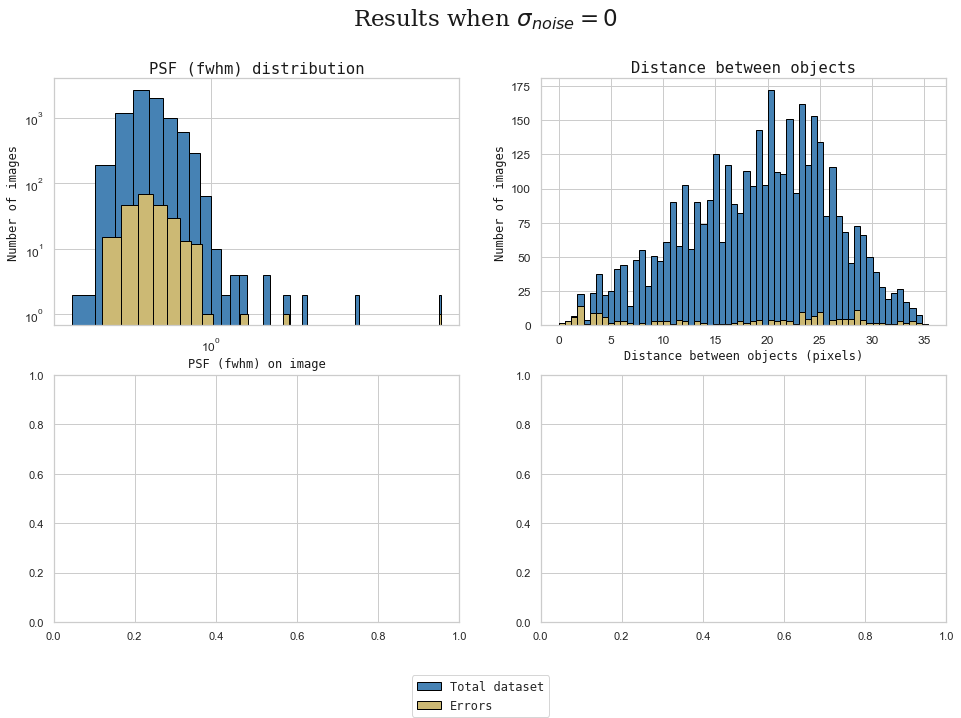

In [77]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
#Start plot
fig, ax = plt.subplots(2,2,figsize=(16,10))
#Title
fig.suptitle('Results when $\sigma_{noise} = 0$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('PSF (fwhm) distribution', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors0['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second plot
ax[0,1].set_title('Distance between objects', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors_na0['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)

#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'normal','size': 12})
plt.show()

## ERRORS AND DISTANCE BETWEEN OBJECTS
---

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


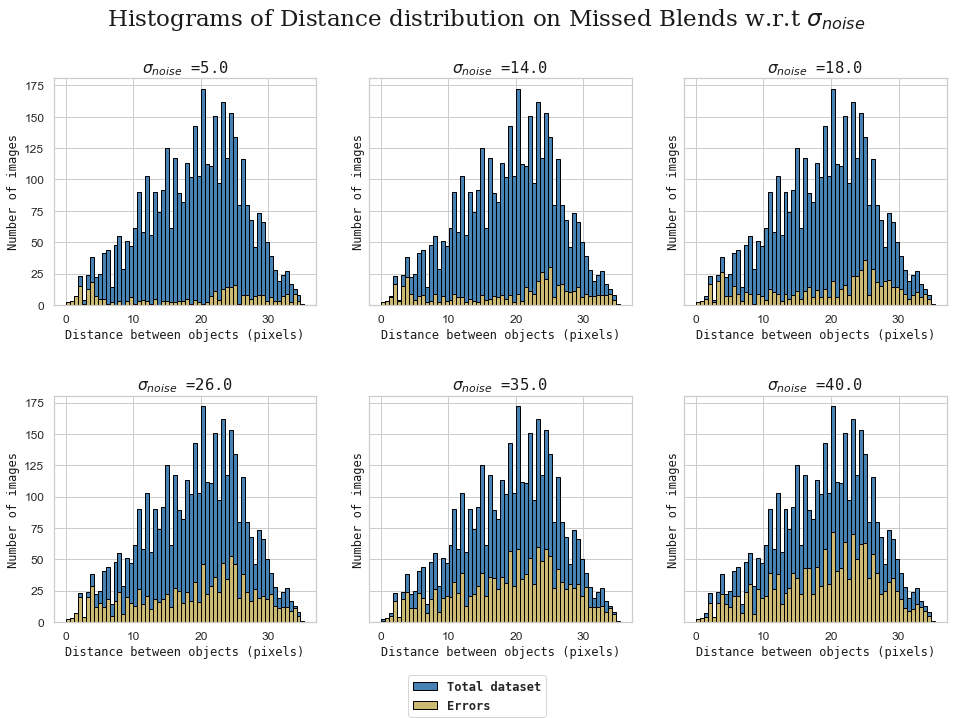

In [427]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
fig, ax = plt.subplots(2,3,figsize=(16,10), sharey='row', sharex=False)
#Title
fig.suptitle('Histograms of Distance distribution on Missed Blends w.r.t $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors_na5['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors_na14['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[0,2].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[0,2].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,2].hist(errors_na18['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,2].set_ylabel('Number of images', fontdict = font)
ax[0,2].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,0].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,0].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(errors_na26['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(errors_na35['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[1,2].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[1,2].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
y=ax[1,2].hist(errors_na40['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,2].set_ylabel('Number of images', fontdict = font)
ax[1,2].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(hspace=0.4)
#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'heavy','size': 12})
plt.show()

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


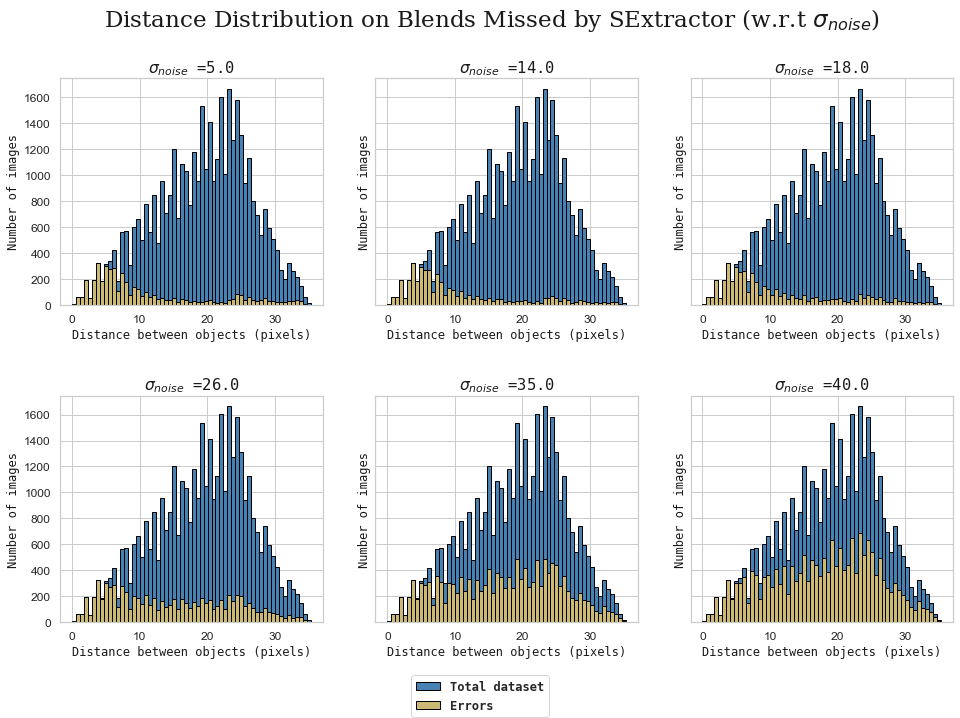

In [428]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
fig, ax = plt.subplots(2,6,figsize=(16,10), sharey='row', sharex=False)
#Title
fig.suptitle('Distance Distribution on Blends Missed by SExtractor (w.r.t $\sigma_{noise}$)', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_sext['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors_sext5['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors_na5['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[1,0].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[1,0].hist(Results_sext['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(errors_sext18['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(Results_sext['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(errors_sext26['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(Results_sext['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(errors_sext35['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[1,2].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[1,2].hist(Results_sext['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
y=ax[1,2].hist(errors_sext40['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,2].set_ylabel('Number of images', fontdict = font)
ax[1,2].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(hspace=0.4)
#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'heavy','size': 12})
plt.show()

NameError: name 'Results_sext' is not defined

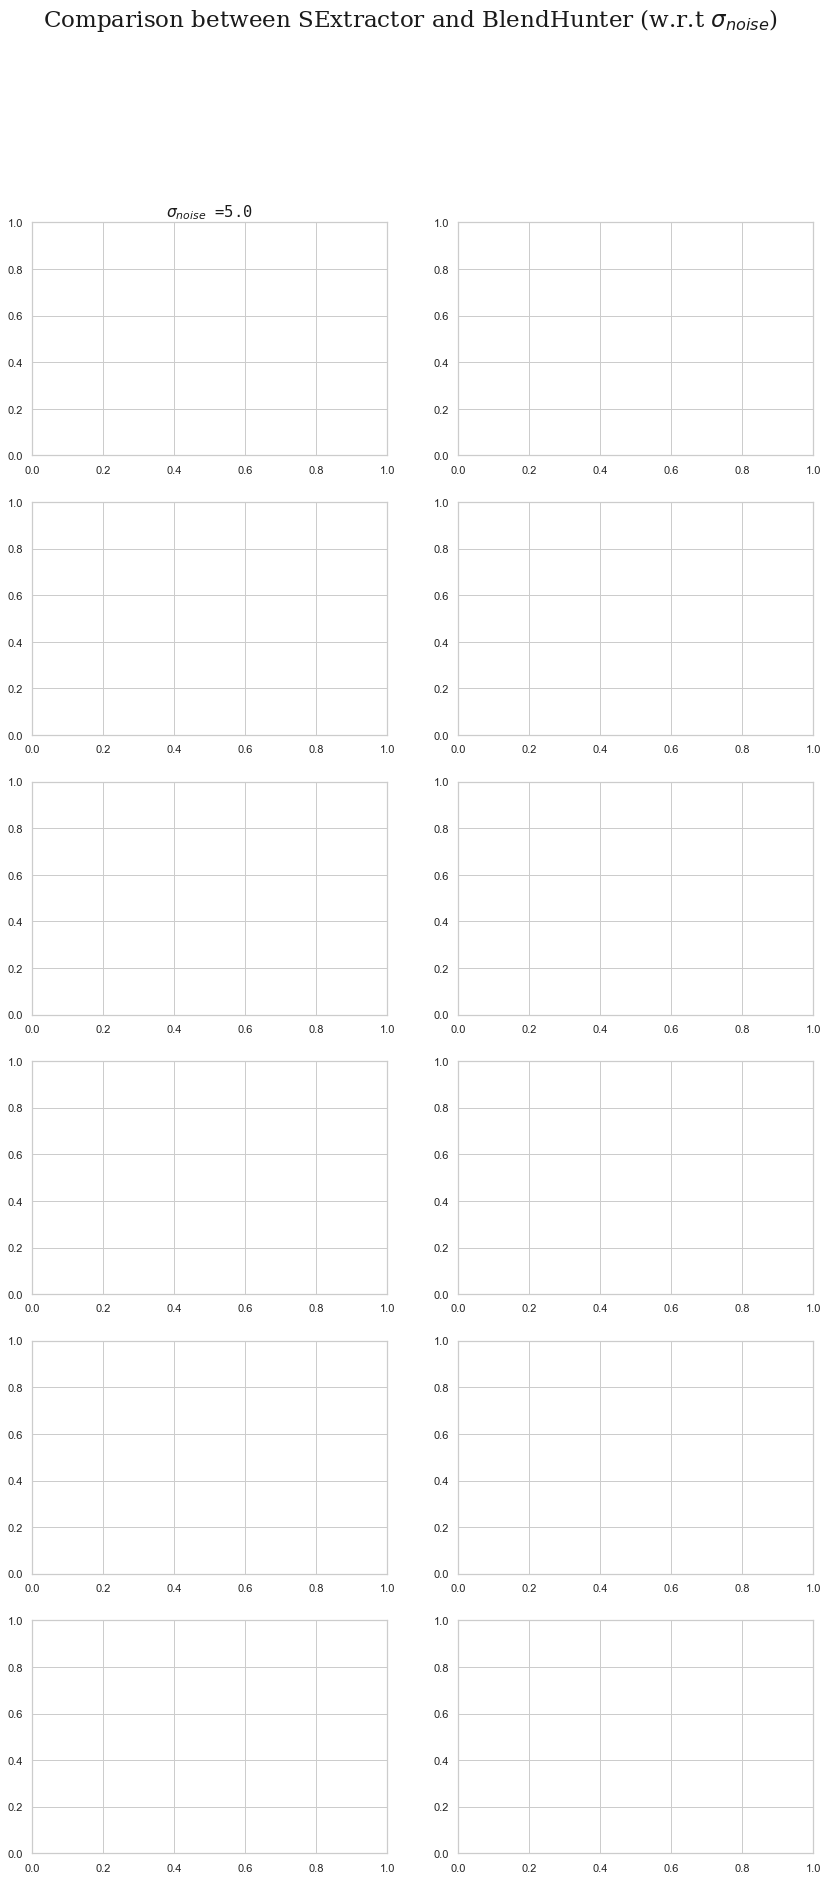

In [63]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
fig, ax = plt.subplots(6,2,figsize=(14,30), sharex=False)
#Title
fig.suptitle('Comparison between SExtractor and BlendHunter (w.r.t $\sigma_{noise}$)', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_sext['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors_sext5['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors_na5['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[1,0].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[1,0].hist(Results_sext['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(errors_sext14['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(errors_na14['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[2,0].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[2,0].hist(Results_sext['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[2,0].hist(errors_sext18['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[2,0].set_ylabel('Number of images', fontdict = font)
ax[2,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,0].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[2,1].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[2,1].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[2,1].hist(errors_na18['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[2,1].set_ylabel('Number of images', fontdict = font)
ax[2,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,1].tick_params(axis='both', which='major', labelsize=12)

#5th subplot 
ax[3,0].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[3,0].hist(Results_sext['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[3,0].hist(errors_sext26['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[3,0].set_ylabel('Number of images', fontdict = font)
ax[3,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[3,0].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[3,1].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[3,1].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[3,1].hist(errors_na26['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[3,1].set_ylabel('Number of images', fontdict = font)
ax[3,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[3,1].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[4,0].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[4,0].hist(Results_sext['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[4,0].hist(errors_sext35['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[4,0].set_ylabel('Number of images', fontdict = font)
ax[4,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[4,0].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[4,1].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[4,1].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[4,1].hist(errors_na35['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[4,1].set_ylabel('Number of images', fontdict = font)
ax[4,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[4,1].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[5,0].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
ax[5,0].hist(Results_sext['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[5,0].hist(errors_sext40['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[5,0].set_ylabel('Number of images', fontdict = font)
ax[5,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[5,0].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[5,1].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
ax[5,1].hist(Results_na['Distance'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[5,1].hist(errors_na40['Distance'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[5,1].set_ylabel('Number of images', fontdict = font)
ax[5,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[5,1].tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(hspace=0.7)

#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'heavy','size': 12})
plt.show()

## ACCURACY AND DISTANCE BETWEEN OBJECT

In [189]:
# How to retrieve informations from each bin in total dataset
def count_per_bin(dataframe =None, get_mean_per_bin =False, column='None', bins_=int(180/3)):
    (n, bins, patches) = plt.hist(dataframe[column], bins = bins_)
    if get_mean_per_bin:
        return n, bins[1:]
    else:
        return n
    
# Computation of errors ratios
def error_ratio_bins(dataframe=None, total=None, column_name ='None', bins_=int(180/3)):
    n = count_per_bin(dataframe, column=column_name, bins_=bins_)
    
    ratio = n/total
    
    return ratio

#### BlendHunter 

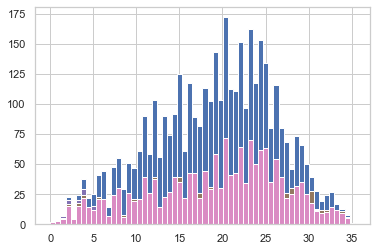

In [169]:
#Get total number per bin and mean distance per bin
n_total, mean_dist = count_per_bin(dataframe=Results_blended, get_mean_per_bin=True, column='Distance')
#Get the ratios (list comprehension)
ratios = [error_ratio_bins(i, n_total, column_name ='Distance') for i in [errors_na5,errors_na14,errors_na18, errors_na26, errors_na35, errors_na40]]

#### SExtractor

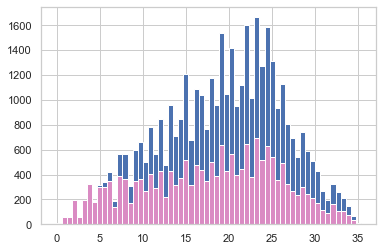

In [171]:
#Get total number per bin and mean distance per bin
n_total_sext, mean_dist_sext = count_per_bin(Results_sext, get_mean_per_bin=True, column = 'Distance')
#Get the ratios (list comprehension)
ratios_sext = [error_ratio_bins(i, n_total_sext, column_name='Distance') for i in [errors_sext5,errors_sext14,errors_sext18, errors_sext26, errors_sext35, errors_sext40]]

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


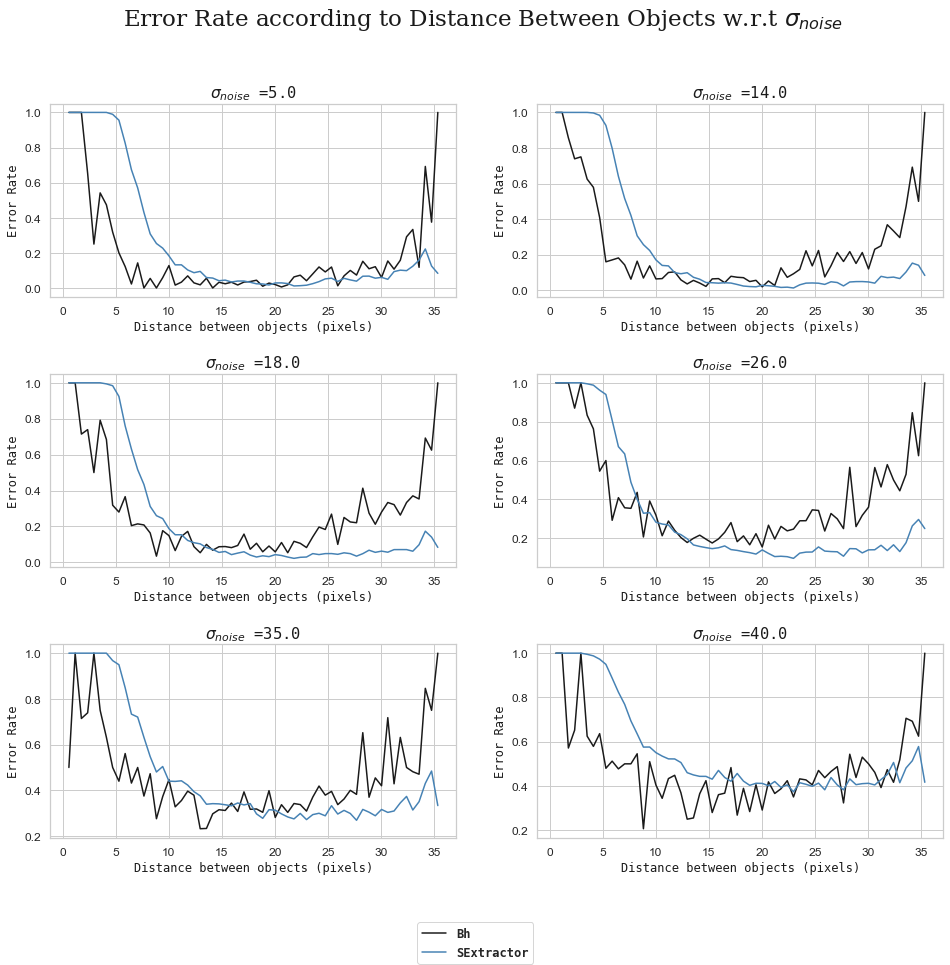

In [421]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
fig, ax = plt.subplots(3,2,figsize=(16,13.5), sharex=False)
#Title
fig.suptitle('Error Rate according to Distance Between Objects w.r.t $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].plot(mean_dist, ratios[0], color = 'k')
ax[0,0].plot(mean_dist_sext, ratios_sext[0], color = 'steelblue')
ax[0,0].set_ylabel('Error Rate', fontdict = font)
ax[0,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].plot(mean_dist, ratios[1], color = 'k')
ax[0,1].plot(mean_dist_sext, ratios_sext[1], color = 'steelblue')
ax[0,1].set_ylabel('Error Rate', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[1,0].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[1,0].plot(mean_dist, ratios[2], color = 'k')
ax[1,0].plot(mean_dist_sext, ratios_sext[2], color = 'steelblue')
ax[1,0].set_ylabel('Error Rate', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,1].plot(mean_dist, ratios[3], color = 'k')
ax[1,1].plot(mean_dist_sext, ratios_sext[3], color = 'steelblue')
ax[1,1].set_ylabel('Error Rate', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[2,0].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[2,0].plot(mean_dist, ratios[4], color = 'k')
ax[2,0].plot(mean_dist_sext, ratios_sext[4], color = 'steelblue')
ax[2,0].set_ylabel('Error Rate', fontdict = font)
ax[2,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,0].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[2,1].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[2,1].plot(mean_dist, ratios[5], color = 'k')
y=ax[2,1].plot(mean_dist_sext, ratios_sext[5], color = 'steelblue')
ax[2,1].set_ylabel('Error Rate', fontdict = font)
ax[2,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[2,1].tick_params(axis='both', which='major', labelsize=12)

#Add legend
labels_legend=["Bh", 'SExtractor']
plt.subplots_adjust(hspace=0.4)
fig.legend([x,y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'heavy','size': 12})
plt.show()

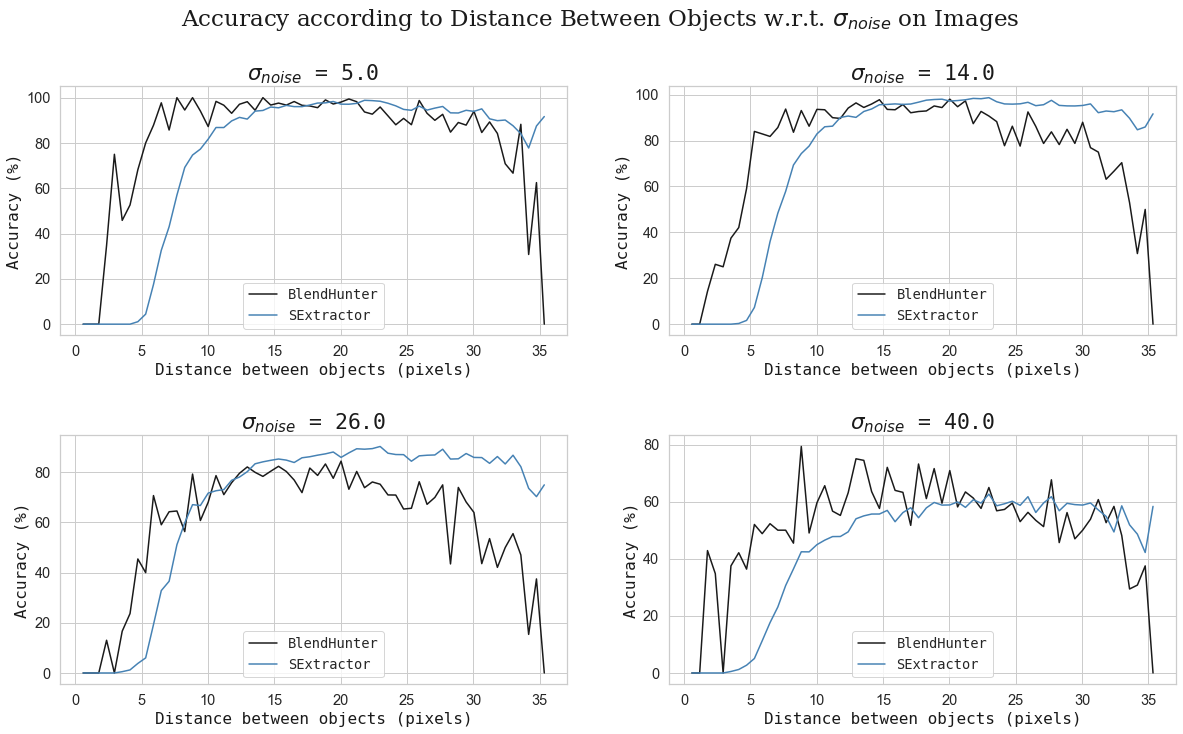

In [131]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 16}
#Start plot
fig, ax = plt.subplots(2,2,figsize=(20,11), sharex=False)
#Title
fig.suptitle('Accuracy according to Distance Between Objects w.r.t. $\sigma_{noise}$ on Images', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ = 5.0', fontdict=font, fontsize=21.5)
ax[0,0].plot(mean_dist, (1 -ratios[0])*100, color = 'k',label ='BlendHunter')
ax[0,0].plot(mean_dist_sext, (1-ratios_sext[0])*100, color = 'steelblue',label ='SExtractor')
ax[0,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,0].tick_params(axis='both', which='major', labelsize=14.5)
ax[0,0].legend(loc='lower center', prop={'family':'monospace', 'size': 13.8})
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ = 14.0', fontdict=font, fontsize=21.5)
ax[0,1].plot(mean_dist, (1-ratios[1])*100, color = 'k',label ='BlendHunter')
ax[0,1].plot(mean_dist_sext, (1-ratios_sext[1])*100, color = 'steelblue',label ='SExtractor')
ax[0,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=14.5)
ax[0,1].legend(loc='lower center', prop={'family':'monospace', 'size': 13.8})
#4th subplot 
ax[1,0].set_title('$\sigma_{noise}$ = 26.0', fontdict=font, fontsize=21.5)
ax[1,0].plot(mean_dist, (1-ratios[3])*100, color = 'k',label ='BlendHunter')
ax[1,0].plot(mean_dist_sext, (1-ratios_sext[3])*100, color = 'steelblue',label ='SExtractor')
ax[1,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=14.5)
ax[1,0].legend(loc='lower center', prop={'family':'monospace', 'size': 13.8})

#6th subplot 
ax[1,1].set_title('$\sigma_{noise}$ = 40.0', fontdict=font, fontsize=21.5)
x=ax[1,1].plot(mean_dist, (1-ratios[5])*100, color = 'k', label ='BlendHunter')
y=ax[1,1].plot(mean_dist_sext, (1-ratios_sext[5])*100, color = 'steelblue', label ='SExtractor')
ax[1,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=14.5)
ax[1,1].legend(loc='lower center', prop={'family':'monospace', 'size': 13.8})

#Add legend
plt.subplots_adjust(hspace=.4)
plt.show()

## ERRORS AND PSF (fwhm)
---

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


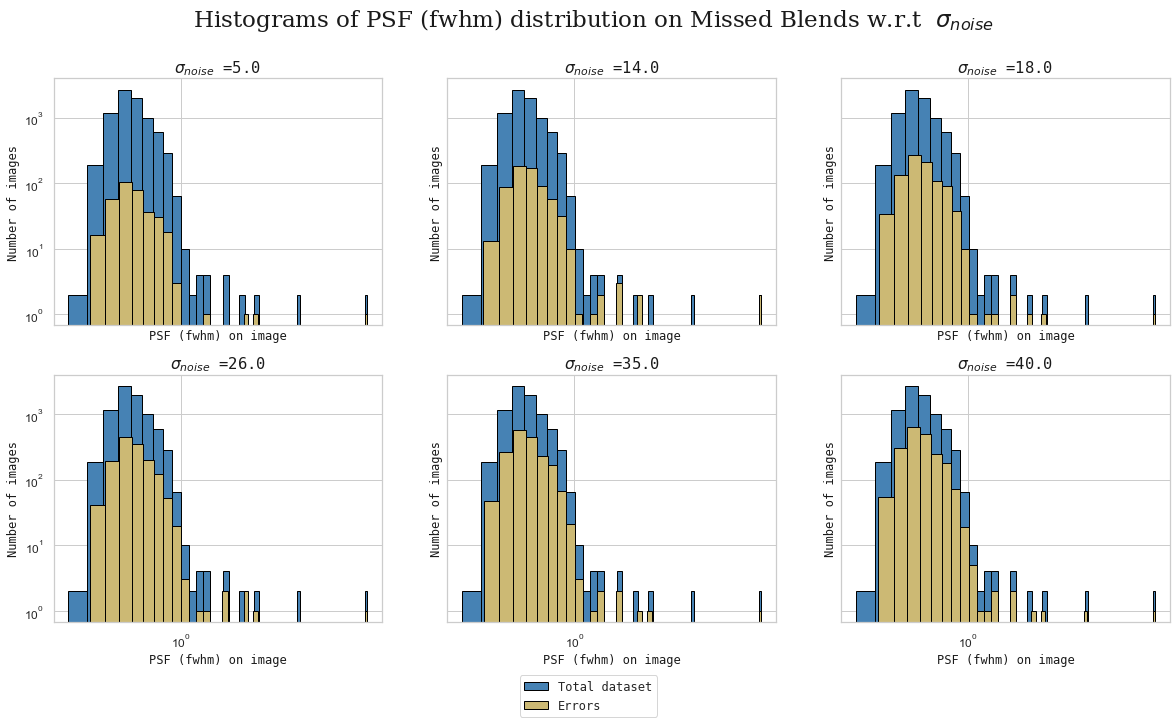

In [146]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
fig, ax = plt.subplots(2,3,figsize=(20,10), sharey='row', sharex=True)
#Title
fig.suptitle('Histograms of PSF (fwhm) distribution on Missed Blends w.r.t  $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors5['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors14['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[0,2].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[0,2].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,2].hist(errors18['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,2].set_ylabel('Number of images', fontdict = font)
ax[0,2].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,0].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,0].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(errors26['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(errors35['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[1,2].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[1,2].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
y=ax[1,2].hist(errors40['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,2].set_ylabel('Number of images', fontdict = font)
ax[1,2].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)

#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'normal','size': 12})

plt.show()

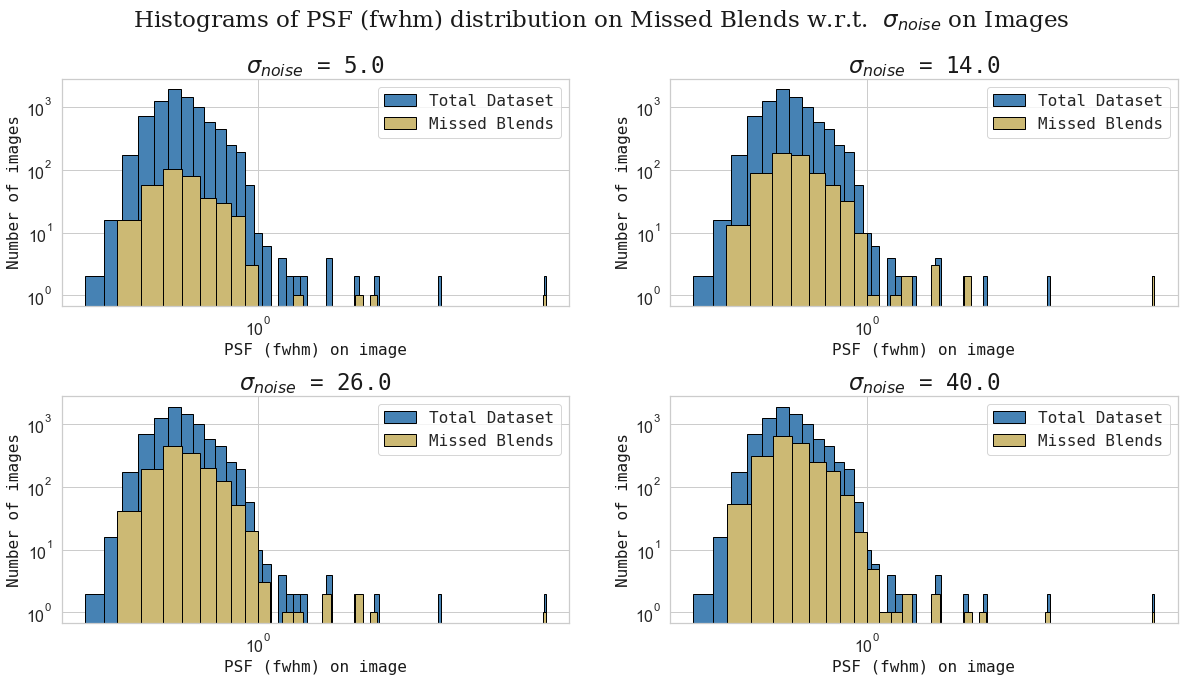

In [158]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 16}
#Start plot
fig, ax = plt.subplots(2,2,figsize=(20,10), sharex=False)
#Title
fig.suptitle('Histograms of PSF (fwhm) distribution on Missed Blends w.r.t.  $\sigma_{noise}$ on Images', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ = 5.0', fontdict=font, fontsize=22.5)
ax[0,0].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/2), label='Total Dataset')
ax[0,0].hist(errors5['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3), label ='Missed Blends')
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].tick_params(axis='both', which='major', labelsize=16)
ax[0,0].legend(loc='upper right', prop={'family':'monospace', 'size':16})

#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ = 14.0', fontdict=font, fontsize=22.5)
ax[0,1].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/2), label='Total Dataset')
ax[0,1].hist(errors14['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3), label ='Missed Blends')
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=16)
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].legend(loc='upper right', prop={'family':'monospace', 'size':16})

#3rd subplot 
ax[1,0].set_title('$\sigma_{noise}$ = 26.0', fontdict=font, fontsize=22.5)
ax[1,0].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/2), label='Total Dataset')
ax[1,0].hist(errors26['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3), label ='Missed Blends')
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=16)
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].legend(loc='upper right', prop={'family':'monospace', 'size':16})

#4th subplot 
ax[1,1].set_title('$\sigma_{noise}$ = 40.0', fontdict=font, fontsize=22.5)
x=ax[1,1].hist(Results_top['fwhm'], color = 'steelblue', edgecolor = 'black', bins = int(180/2), label='Total Dataset')
y=ax[1,1].hist(errors40['fwhm'], color = 'y', edgecolor = 'black', bins = int(180/3), label ='Missed Blends')
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('PSF (fwhm) on image', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=16)
ax[1,1].legend(loc='upper right', prop={'family':'monospace', 'size':16})
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')

plt.subplots_adjust(hspace=.4)
#Add legend
#labels_legend=["Total dataset", "Errors"]
#fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'normal','size': 12})

plt.show()

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


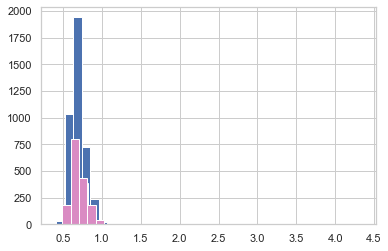

In [199]:
###BLENDHUNTER
#Get total number per bin and mean distance per bin
total_fwhm, mean_fwhm = count_per_bin(dataframe=Results_blended, get_mean_per_bin=True, column='fwhm', bins_=int(180/5))
#Get the ratios (list comprehension)
ratios_fwhm = [error_ratio_bins(i, total_fwhm, column_name ='fwhm', bins_=int(180/5)) for i in [errors_na5,errors_na14,errors_na18, errors_na26, errors_na35, errors_na40]]

In [200]:
total_fwhm

array([3.300e+01, 1.033e+03, 1.943e+03, 7.230e+02, 2.400e+02, 1.700e+01,
       3.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00])

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


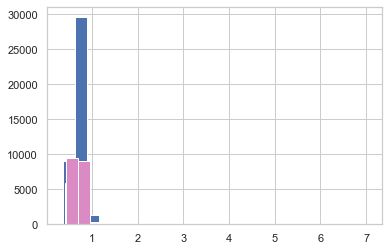

In [201]:
###SEXTRACTOR
#Get total number per bin and mean distance per bin
total_fwhm_sext, mean_fwhm_sext = count_per_bin(Results_sext, get_mean_per_bin=True, column = 'fwhm', bins_=int(180/7))
#Get the ratios (list comprehension)
ratios_sext_fwhm = [error_ratio_bins(i, total_fwhm_sext, column_name='fwhm', bins_=int(180/7)) for i in [errors_sext5,errors_sext14,errors_sext18, errors_sext26, errors_sext35, errors_sext40]]

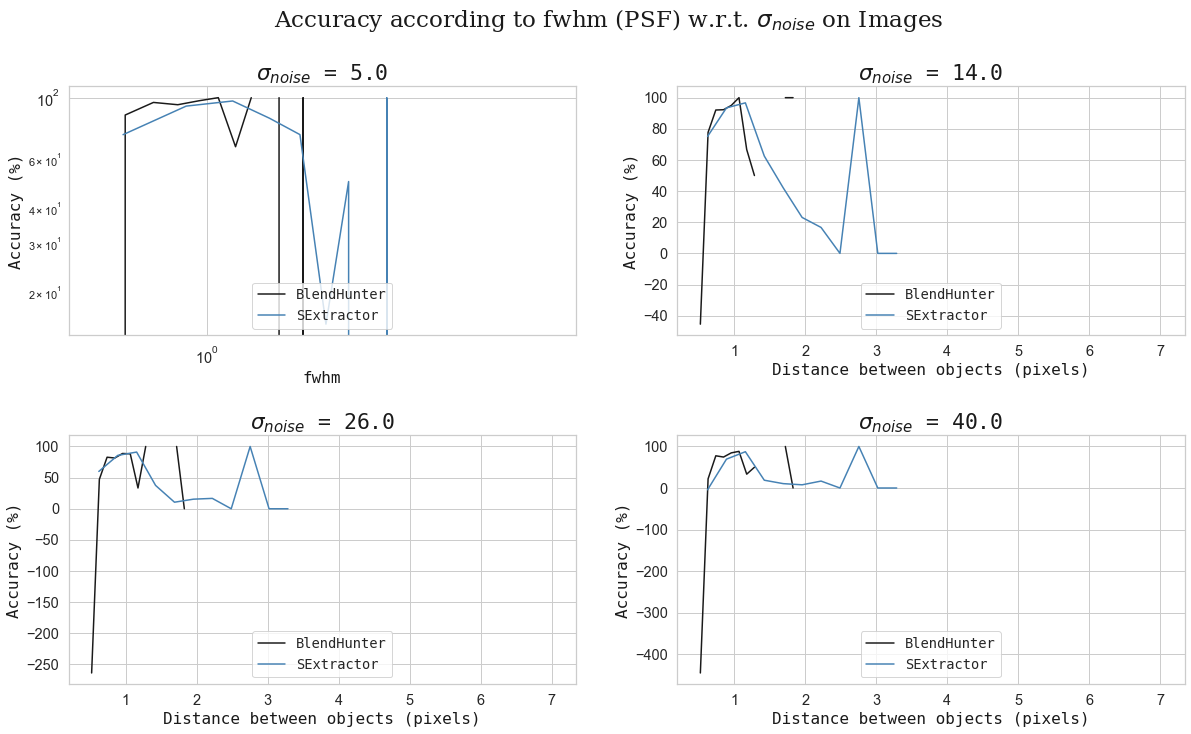

In [202]:
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 16}
#Start plot
fig, ax = plt.subplots(2,2,figsize=(20,11), sharex=False)
#Title
fig.suptitle('Accuracy according to fwhm (PSF) w.r.t. $\sigma_{noise}$ on Images', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ = 5.0', fontdict=font, fontsize=21.5)
ax[0,0].plot(mean_fwhm, (1 -ratios_fwhm[0])*100, color = 'k',label ='BlendHunter')
ax[0,0].plot(mean_fwhm_sext, (1-ratios_sext_fwhm[0])*100, color = 'steelblue',label ='SExtractor')
ax[0,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,0].set_xlabel('fwhm', fontdict = font)
ax[0,0].tick_params(axis='both', which='major', labelsize=14.5)
ax[0,0].legend(loc='lower center', prop={'family':'monospace', 'size': 13.8})
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')


#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ = 14.0', fontdict=font, fontsize=21.5)
ax[0,1].plot(mean_fwhm, (1-ratios_fwhm[1])*100, color = 'k',label ='BlendHunter')
ax[0,1].plot(mean_fwhm_sext, (1-ratios_sext_fwhm[1])*100, color = 'steelblue',label ='SExtractor')
ax[0,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=14.5)
ax[0,1].legend(loc='lower center', prop={'family':'monospace', 'size': 13.8})
#4th subplot 
ax[1,0].set_title('$\sigma_{noise}$ = 26.0', fontdict=font, fontsize=21.5)
ax[1,0].plot(mean_fwhm, (1-ratios_fwhm[3])*100, color = 'k',label ='BlendHunter')
ax[1,0].plot(mean_fwhm_sext, (1-ratios_sext_fwhm[3])*100, color = 'steelblue',label ='SExtractor')
ax[1,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=14.5)
ax[1,0].legend(loc='lower center', prop={'family':'monospace', 'size': 13.8})

#6th subplot 
ax[1,1].set_title('$\sigma_{noise}$ = 40.0', fontdict=font, fontsize=21.5)
x=ax[1,1].plot(mean_fwhm, (1-ratios_fwhm[5])*100, color = 'k', label ='BlendHunter')
y=ax[1,1].plot(mean_fwhm_sext, (1-ratios_sext_fwhm[5])*100, color = 'steelblue', label ='SExtractor')
ax[1,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=14.5)
ax[1,1].legend(loc='lower center', prop={'family':'monospace', 'size': 13.8})

#Add legend
plt.subplots_adjust(hspace=.4)
plt.show()

## ERRORS AND SNR OF THE CENTRAL OBJECT ( $\alpha$ )
---

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


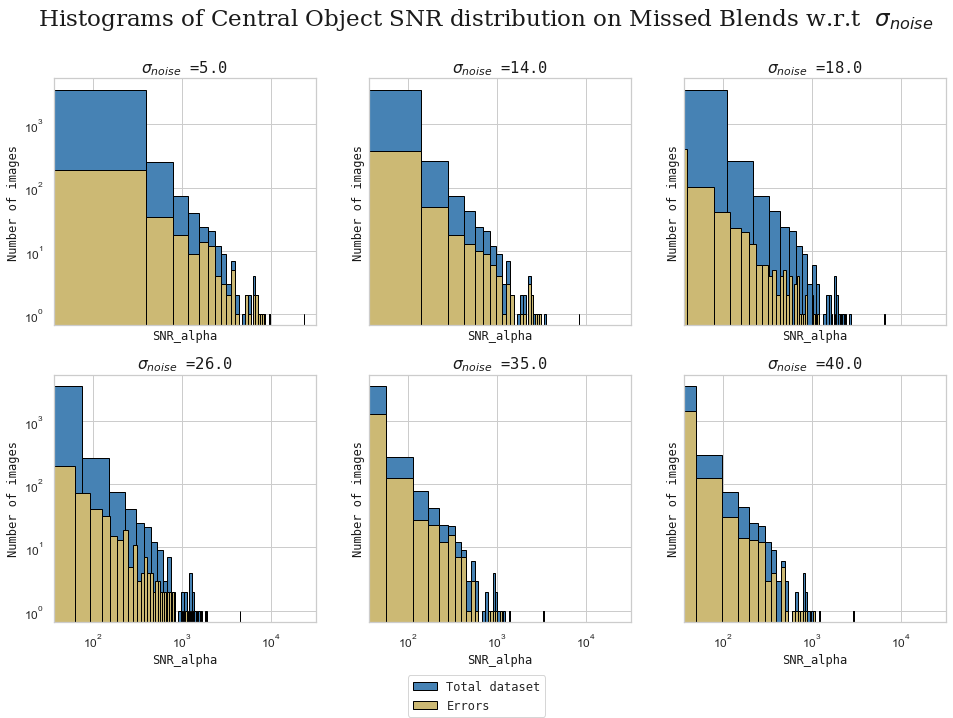

In [320]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#STart plot
fig, ax = plt.subplots(2,3,figsize=(16,10), sharey='row', sharex=True)
#Title
fig.suptitle('Histograms of Central Object SNR distribution on Missed Blends w.r.t  $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_na['snr_a5'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors_na5['snr_a5'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('SNR_alpha', fontdict = font)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_na['snr_a14'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors_na14['snr_a14'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('SNR_alpha', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[0,2].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[0,2].hist(Results_na['snr_a18'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,2].hist(errors_na18['snr_a18'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,2].set_ylabel('Number of images', fontdict = font)
ax[0,2].set_xlabel('SNR_alpha', fontdict = font)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,0].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,0].hist(Results_na['snr_a26'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(errors_na26['snr_a26'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('SNR_alpha', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(Results_na['snr_a35'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(errors_na35['snr_a35'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('SNR_alpha', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[1,2].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[1,2].hist(Results_na['snr_a40'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
y=ax[1,2].hist(errors_na40['snr_a40'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,2].set_ylabel('Number of images', fontdict = font)
ax[1,2].set_xlabel('SNR_alpha', fontdict = font)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)

#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'normal','size': 12})

plt.show()

## ERRORS AND SNR OF SECOND OBJECT ( $\beta$ )
---

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


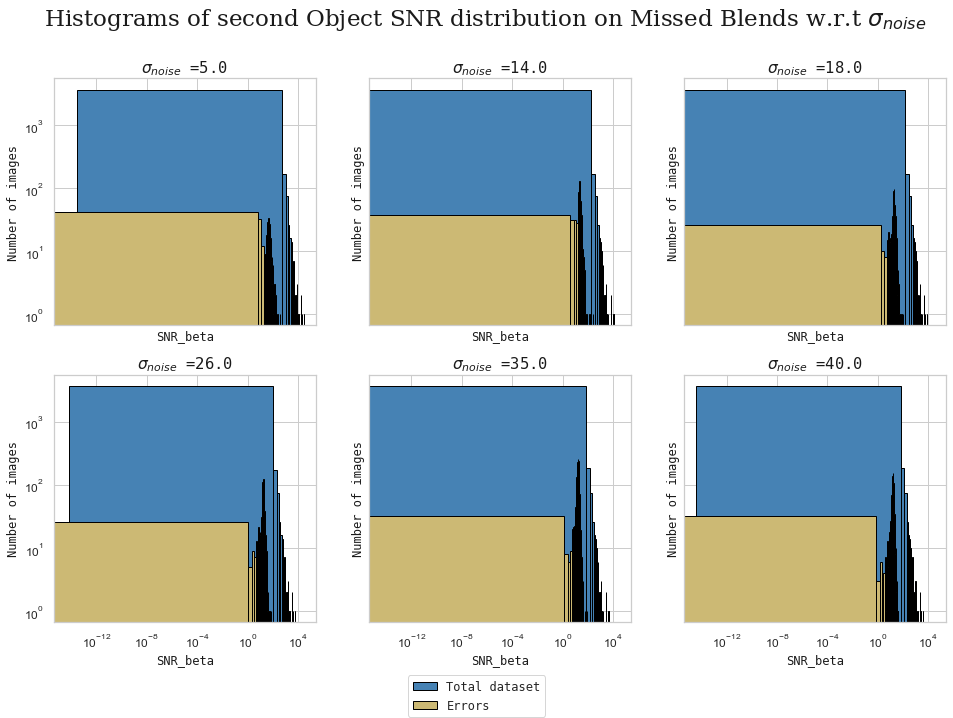

In [88]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
fig, ax = plt.subplots(2,3,figsize=(16,10), sharey='row', sharex=True)
#Title
fig.suptitle('Histograms of second Object SNR distribution on Missed Blends w.r.t $\sigma_{noise}$', fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)

#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_na['snr_b5'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors_na5['snr_b5'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('SNR_beta', fontdict = font)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_na['snr_b14'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors_na14['snr_b14'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('SNR_beta', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[0,2].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[0,2].hist(Results_na['snr_b18'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,2].hist(errors_na18['snr_b18'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,2].set_ylabel('Number of images', fontdict = font)
ax[0,2].set_xlabel('SNR_beta', fontdict = font)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,0].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,0].hist(Results_na['snr_b26'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(errors_na26['snr_b26'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('SNR_beta', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(Results_na['snr_b35'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(errors_na35['snr_b35'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('SNR_beta', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[1,2].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[1,2].hist(Results_na['snr_b40'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
y=ax[1,2].hist(errors_na40['snr_b40'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,2].set_ylabel('Number of images', fontdict = font)
ax[1,2].set_xlabel('SNR_beta', fontdict = font)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)

#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'normal','size': 12})

plt.show()

## ERRORS AND PSI RATIO (SNR_$\alpha$/SNR_$\beta$)

/Users/alacan/miniconda3/envs/deblending/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


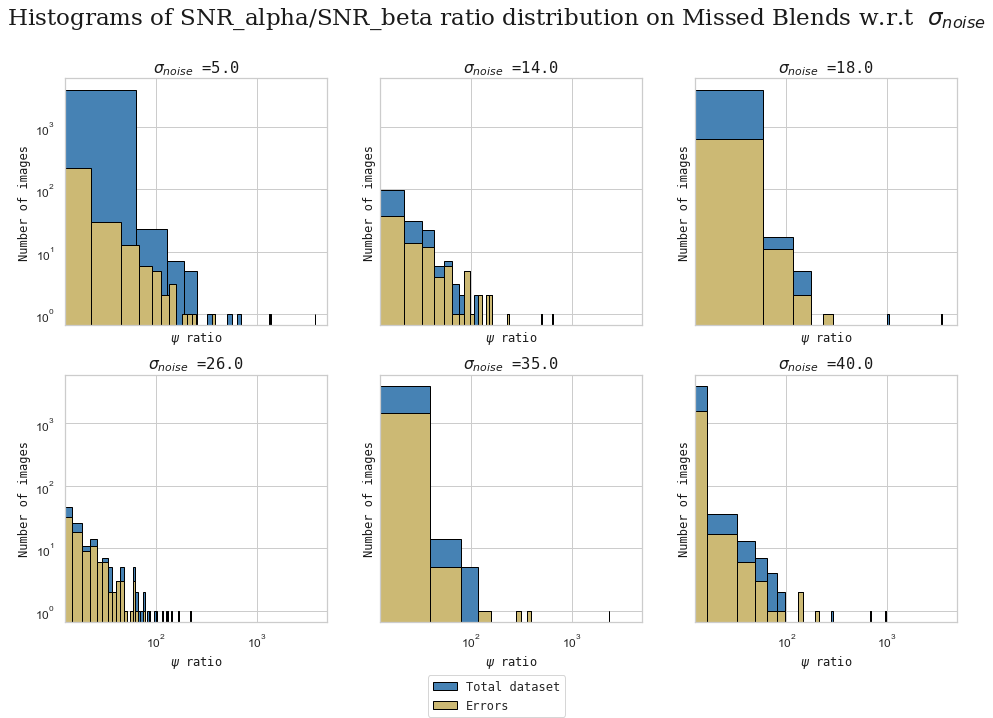

In [321]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dict
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 12}
#Start plot
fig, ax = plt.subplots(2,3,figsize=(16,10), sharey='row', sharex=True)
#Title
fig.suptitle('Histograms of SNR_alpha/SNR_beta ratio distribution on Missed Blends w.r.t  $\sigma_{noise}$', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ =5.0', fontdict=font, fontsize=15.5)
ax[0,0].hist(Results_na_finite['psi5'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,0].hist(errors_na_finite5['psi5'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,0].set_ylabel('Number of images', fontdict = font)
ax[0,0].set_xlabel('$\psi$ ratio', fontdict = font)
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ =14.0', fontdict=font, fontsize=15.5)
ax[0,1].hist(Results_na_finite['psi14'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,1].hist(errors_na_finite14['psi14'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,1].set_ylabel('Number of images', fontdict = font)
ax[0,1].set_xlabel('$\psi$ ratio', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
#3rd subplot 
ax[0,2].set_title('$\sigma_{noise}$ =18.0', fontdict=font, fontsize=15.5)
ax[0,2].hist(Results_na_finite['psi18'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[0,2].hist(errors_na_finite18['psi18'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[0,2].set_ylabel('Number of images', fontdict = font)
ax[0,2].set_xlabel('$\psi$ ratio', fontdict = font)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
#4th subplot 
ax[1,0].set_title('$\sigma_{noise}$ =26.0', fontdict=font, fontsize=15.5)
ax[1,0].hist(Results_na_finite['psi26'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,0].hist(errors_na_finite26['psi26'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,0].set_ylabel('Number of images', fontdict = font)
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('$\psi$ ratio', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
#5th subplot 
ax[1,1].set_title('$\sigma_{noise}$ =35.0', fontdict=font, fontsize=15.5)
ax[1,1].hist(Results_na_finite['psi35'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
ax[1,1].hist(errors_na_finite35['psi35'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,1].set_ylabel('Number of images', fontdict = font)
ax[1,1].set_xlabel('$\psi$ ratio', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
#6th subplot 
ax[1,2].set_title('$\sigma_{noise}$ =40.0', fontdict=font, fontsize=15.5)
x=ax[1,2].hist(Results_na_finite['psi40'], color = 'steelblue', edgecolor = 'black', bins = int(180/3))
y=ax[1,2].hist(errors_na_finite40['psi40'], color = 'y', edgecolor = 'black', bins = int(180/3))
ax[1,2].set_ylabel('Number of images', fontdict = font)
ax[1,2].set_xlabel('$\psi$ ratio', fontdict = font)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)

#Add legend
labels_legend=["Total dataset", "Errors"]
fig.legend([x, y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'normal','size': 12})

plt.show()

In [322]:
Results_na_finite['snr_a26'].describe()

count    3963.000000
mean       49.590372
std       123.144116
min         0.000000
25%        17.926418
50%        23.060236
75%        39.121537
max      4562.156504
Name: snr_a26, dtype: float64

In [323]:
Results_na_finite['snr_b26'].describe()

count    3963.000000
mean       53.550933
std       191.855703
min         0.305013
25%        17.165031
50%        21.953192
75%        35.447202
max      5789.241056
Name: snr_b26, dtype: float64

In [324]:
Results_na_finite['psi26'].describe()

count    3963.000000
mean        2.601156
std         8.441505
min         0.000000
25%         0.605125
50%         1.059827
75%         1.795361
max       219.297952
Name: psi26, dtype: float64

## TRAINING AND VALIDATION ACCURACY

In [19]:
path_history = '/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/{}/BlendHunterData/test/test/history.npy'

def import_history(bh_path=None):
    return np.load(path_history.format(bh_path), allow_pickle=True).item()

#Import dict with train and valid loss/acc
history5 = import_history(bh_path='bh_5')
epoch_array5 = np.arange(len(history5['acc']))
history14 = import_history(bh_path='bh_14')
epoch_array14 = np.arange(len(history14['acc']))
history26 = import_history(bh_path='bh_26')
epoch_array26 = np.arange(len(history26['acc']))
history40 = import_history(bh_path='bh_40_1')
epoch_array40 = np.arange(len(history40['acc']))
history35 = import_history(bh_path='bh_35')
epoch_array35 = np.arange(len(history35['acc']))

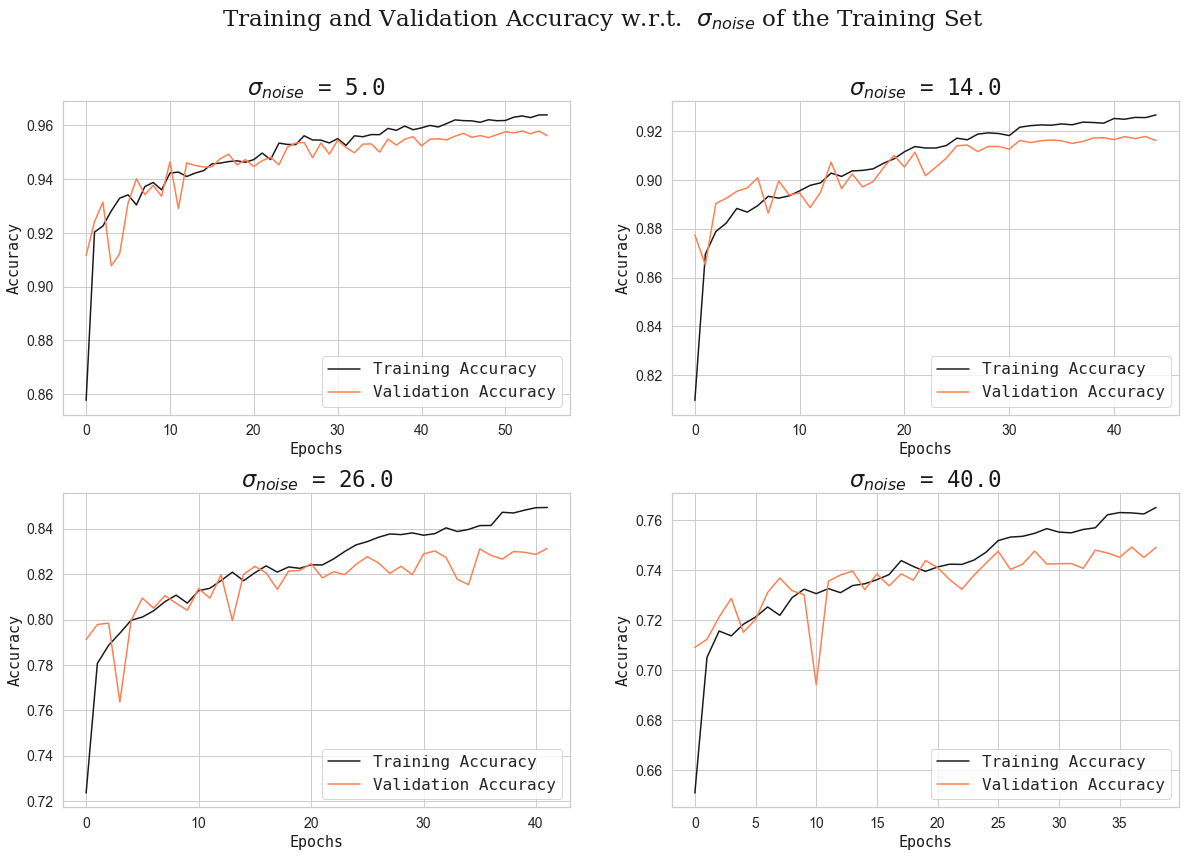

In [53]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 15}
#Start plot
fig, ax = plt.subplots(2,2,figsize=(20,13), sharex=False)
#Title
fig.suptitle('Training and Validation Accuracy w.r.t.  $\sigma_{noise}$ of the Training Set', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('$\sigma_{noise}$ = 5.0', fontdict=font, fontsize=22.5)
ax[0,0].plot(epoch_array5, history5['acc'], color = 'k', label = 'Training Accuracy')
ax[0,0].plot(epoch_array5, history5['val_acc'], color = 'coral', label= 'Validation Accuracy')
ax[0,0].set_ylabel('Accuracy', fontdict = font)
ax[0,0].set_xlabel('Epochs', fontdict = font)
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].legend(loc='lower right', prop ={'family': 'monospace','weight': 'normal','size':16})

#Second subplot 
ax[0,1].set_title('$\sigma_{noise}$ = 14.0', fontdict=font, fontsize=22.5)
ax[0,1].plot(epoch_array14, history14['acc'], color = 'k', label = 'Training Accuracy')
ax[0,1].plot(epoch_array14, history14['val_acc'], color = 'coral', label= 'Validation Accuracy')
ax[0,1].set_ylabel('Accuracy', fontdict = font)
ax[0,1].set_xlabel('Epochs', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].legend(loc='lower right', prop ={'family': 'monospace','weight': 'normal','size':16})

#3rd subplot 
ax[1,0].set_title('$\sigma_{noise}$ = 26.0', fontdict=font, fontsize=22.5)
ax[1,0].plot(epoch_array26, history26['acc'], color = 'k', label = 'Training Accuracy')
ax[1,0].plot(epoch_array26, history26['val_acc'], color = 'coral', label= 'Validation Accuracy')
ax[1,0].set_ylabel('Accuracy', fontdict = font)
ax[1,0].set_xlabel('Epochs', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].legend(loc='lower right', prop ={'family': 'monospace','weight': 'normal','size':16})

#4th subplot 
ax[1,1].set_title('$\sigma_{noise}$ = 40.0', fontdict=font, fontsize=22.5)
ax[1,1].plot(epoch_array40, history40['acc'], color = 'k', label = 'Training Accuracy')
ax[1,1].plot(epoch_array40, history40['val_acc'], color = 'coral', label= 'Validation Accuracy')
ax[1,1].set_ylabel('Accuracy', fontdict = font)
ax[1,1].set_xlabel('Epochs', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].legend(loc='lower right', prop ={'family': 'monospace','weight': 'normal', 'size':16})
#Add legend
#labels_legend=["Bh", 'SExtractor']
plt.subplots_adjust(hspace=0.25)
#fig.legend([x,y], labels=labels_legend, borderaxespad=0.1, loc="lower center", fontsize=13, prop ={'family': 'monospace','weight': 'heavy','size': 12})
plt.show()

# 4. RESULTS ON REAL DATA

In [222]:
#Paths
path_real = '/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/bh_real'

#Predicted labels
pred_real0 = np.array([np.load(path_real+'/BlendHunterData/test/test/pred_top0.npy', allow_pickle=True)])
pred_real5 = np.array([np.load(path_real+'/BlendHunterData/test/test/pred_top5.npy', allow_pickle=True)])
pred_real14 = np.array([np.load(path_real+'/BlendHunterData/test/test/pred_top14.npy', allow_pickle=True)])
pred_real18 = np.array([np.load(path_real+'/BlendHunterData/test/test/pred_top18.npy', allow_pickle=True)])
pred_real26 = np.array([np.load(path_real+'/BlendHunterData/test/test/pred_top26.npy', allow_pickle=True)])
pred_real35 = np.array([np.load(path_real+'/BlendHunterData/test/test/pred_top35.npy', allow_pickle=True)])
pred_real40 = np.array([np.load(path_real+'/BlendHunterData/test/test/pred_top40.npy', allow_pickle=True)])

In [224]:
#True labels
labels_real = np.load(path_real+'/BlendHunterData/test/test/labels.npy', allow_pickle=True)

#Reshape predicted labels array
#preds0 = np.array([pred_top0])

#Concatenate arrays
results_real=np.concatenate((labels.transpose(), pred_real0.transpose(), pred_real5.transpose(), pred_real14.transpose(), pred_real18.transpose()
                              , pred_real26.transpose(), pred_real35.transpose(), pred_real40.transpose()),axis=1)

# Create a DataFrame object
Results_real = pd.DataFrame(results_real, columns=['Labels', 'Preds0', 'Preds5', 'Preds14', 'Preds18', 'Preds26', 'Preds35', 'Preds40'])
print('The shape of our dataframe is '+str(Results_real.shape))

The shape of our dataframe is (8000, 8)


In [226]:
#X parameter extracted from test images
param_x_real = np.load(path_real+"/test_param_x.npy", allow_pickle=True)

#Y parameter extracted from test images
param_y_real = np.load(path_real+"/test_param_y.npy", allow_pickle=True)

# Add 2 columns to the dataframe 
Results_real['param_x']=pd.DataFrame(param_x_real)
Results_real['param_y']=pd.DataFrame(param_y_real)

#Adding a new column 'Distance' which corresponds to the sqrt of (x² + y²)
Results_real['Distance']= pd.DataFrame(np.sqrt(Results_real['param_x']**2 + Results_real['param_y']**2))

In [228]:
#Drop NaN because issue when plotting otherwise
Results_blends_real = Results_real.dropna(axis=0, how='any')

In [230]:
#Create errors dataframe for each level of sigma

# Apply function (true different from predicted)
ER0_r = Results_real.apply(lambda x: True if x['Labels'] != x['Preds0'] else False , axis=1)
ER5_r = Results_real.apply(lambda x: True if x['Labels'] != x['Preds5'] else False , axis=1)
ER14_r = Results_real.apply(lambda x: True if x['Labels'] != x['Preds14'] else False , axis=1)
ER18_r = Results_real.apply(lambda x: True if x['Labels'] != x['Preds18'] else False , axis=1)
ER26_r = Results_real.apply(lambda x: True if x['Labels'] != x['Preds26'] else False , axis=1)
ER35_r = Results_real.apply(lambda x: True if x['Labels'] != x['Preds35'] else False , axis=1)
ER40_r = Results_real.apply(lambda x: True if x['Labels'] != x['Preds40'] else False , axis=1)

#Merging the Results_top dataframe with the errors dataframe in order to keep only wrongfully predicted data
errors0_r = pd.merge(pd.DataFrame(ER0_r[ER0_r ==True]), Results_real, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na0_r = errors0.dropna(axis=0, how='any')
"""----------------------"""
errors5_r = pd.merge(pd.DataFrame(ER5_r[ER5_r ==True]), Results_real, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na5_r = errors5.dropna(axis=0, how='any')
"""-----------------------"""
errors14_r = pd.merge(pd.DataFrame(ER14_r[ER14_r ==True]), Results_real, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na14_r = errors14.dropna(axis=0, how='any')
"""-----------------------"""

errors18_r = pd.merge(pd.DataFrame(ER18_r[ER18_r ==True]), Results_real, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na18_r = errors18.dropna(axis=0, how='any')
"""-----------------------"""

errors26_r = pd.merge(pd.DataFrame(ER26_r[ER26_r ==True]), Results_real, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na26_r = errors26.dropna(axis=0, how='any')
"""-----------------------"""

errors35_r = pd.merge(pd.DataFrame(ER35_r[ER35_r ==True]), Results_real, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na35_r = errors35.dropna(axis=0, how='any')
"""-----------------------"""

errors40_r = pd.merge(pd.DataFrame(ER40_r[ER40_r ==True]), Results_real, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)
#Dropping NaN
errors_na40_r = errors40.dropna(axis=0, how='any')


In [ ]:
#Import flags
flags_r = np.load('/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/sep_results/flags_real.npy', allow_pickle=True)
flags_r= flags_r.reshape(1,40000).transpose()

#Dataframe
Sep_real = pd.DataFrame(flags_r, columns = ['flags'])

blended_real = np.load('/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/axel_sims/deblending_real/blend/gal_obj_0.npy', allow_pickle=True)

#Getting the shift parameters
param_x_total_real = np.array([blended_real[val]['blend_param']['dx'] for val in range(blended_real.size)])
param_y_total_real = np.array([blended_real[val]['blend_param']['dy'] for val in range(blended_real.size)])

#Getting the fwhm (PSF) values
#fwhm_total = np.array([blended_images[val]['PSF']['fwhm'] for val in range(blended_images.size)])
#Add column to datafram
#Results_sext['fwhm'] = pd.DataFrame(fwhm_total)

# Add 2 columns to the dataframe 
Sep_real['param_x_total']=pd.DataFrame(param_x_total_real)
Sep_real['param_y_total']=pd.DataFrame(param_y_total_real)

#Adding a new column 'Distance' which corresponds to the sqrt of (x² + y²)
Sep_real['Distance']= pd.DataFrame(np.sqrt(Sep_real['param_x_total']**2 + Sep_real['param_y_total']**2))

In [234]:
#Errors to dataframe
errors_s = Sep_real.apply(lambda x: True if x['flags'] == 0 or x['flags'] == 16 else False , axis=1)
errors_sep_r = pd.merge(pd.DataFrame(errors_s[errors_s ==True]), Sep_real, how='inner', left_index=True, right_index=True, sort=True, copy=True, indicator=False)

In [236]:
errors_sep_r.shape

(5400, 5)

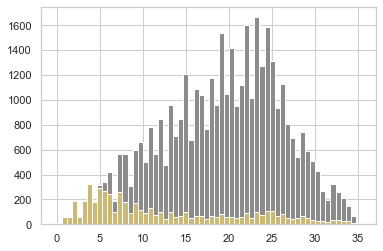

In [238]:
#Get total number per bin and mean distance per bin
total_real, mean_dist_real = count_per_bin(dataframe=Results_blends_real, get_mean_per_bin=True, column='Distance')
#Get the ratios (list comprehension)
ratios_real = [error_ratio_bins(i, total_real, column_name ='Distance') for i in [errors_na5_r,errors_na14_r,errors_na18_r, errors_na26_r, errors_na35_r, errors_na40_r]]

#### SExtractor

#Get total number per bin and mean distance per bin
total_sep_real, mean_dist_sep_real = count_per_bin(Sep_real, get_mean_per_bin=True, column = 'Distance')
#Get the ratios (list comprehension)
ratios_sep_real = error_ratio_bins(errors_sep_r, total_sep_real, column_name='Distance')

In [249]:
np.array([ratios_real])

array([[[1.        , 1.        , 1.        , 0.65217391, 0.25      ,
         0.54166667, 0.47368421, 0.31818182, 0.2       , 0.12195122,
         0.02272727, 0.14285714, 0.        , 0.05454545, 0.        ,
         0.05882353, 0.12765957, 0.01639344, 0.03333333, 0.06896552,
         0.02912621, 0.01785714, 0.05555556, 0.        , 0.0326087 ,
         0.024     , 0.03278689, 0.01709402, 0.03370787, 0.03658537,
         0.04424779, 0.00980392, 0.02797203, 0.01941748, 0.00581395,
         0.01785714, 0.06306306, 0.07284768, 0.04123711, 0.08024691,
         0.11965812, 0.09150327, 0.11940299, 0.0125    , 0.06896552,
         0.1       , 0.07352941, 0.15217391, 0.10958904, 0.12121212,
         0.06      , 0.15384615, 0.10714286, 0.15789474, 0.29166667,
         0.33333333, 0.11764706, 0.69230769, 0.375     , 1.        ],
        [1.        , 1.        , 0.85714286, 0.73913043, 0.75      ,
         0.625     , 0.57894737, 0.40909091, 0.16      , 0.17073171,
         0.18181818, 0.14285714, 

In [251]:
ratios_real[0]

array([1.        , 1.        , 1.        , 0.65217391, 0.25      ,
       0.54166667, 0.47368421, 0.31818182, 0.2       , 0.12195122,
       0.02272727, 0.14285714, 0.        , 0.05454545, 0.        ,
       0.05882353, 0.12765957, 0.01639344, 0.03333333, 0.06896552,
       0.02912621, 0.01785714, 0.05555556, 0.        , 0.0326087 ,
       0.024     , 0.03278689, 0.01709402, 0.03370787, 0.03658537,
       0.04424779, 0.00980392, 0.02797203, 0.01941748, 0.00581395,
       0.01785714, 0.06306306, 0.07284768, 0.04123711, 0.08024691,
       0.11965812, 0.09150327, 0.11940299, 0.0125    , 0.06896552,
       0.1       , 0.07352941, 0.15217391, 0.10958904, 0.12121212,
       0.06      , 0.15384615, 0.10714286, 0.15789474, 0.29166667,
       0.33333333, 0.11764706, 0.69230769, 0.375     , 1.        ])

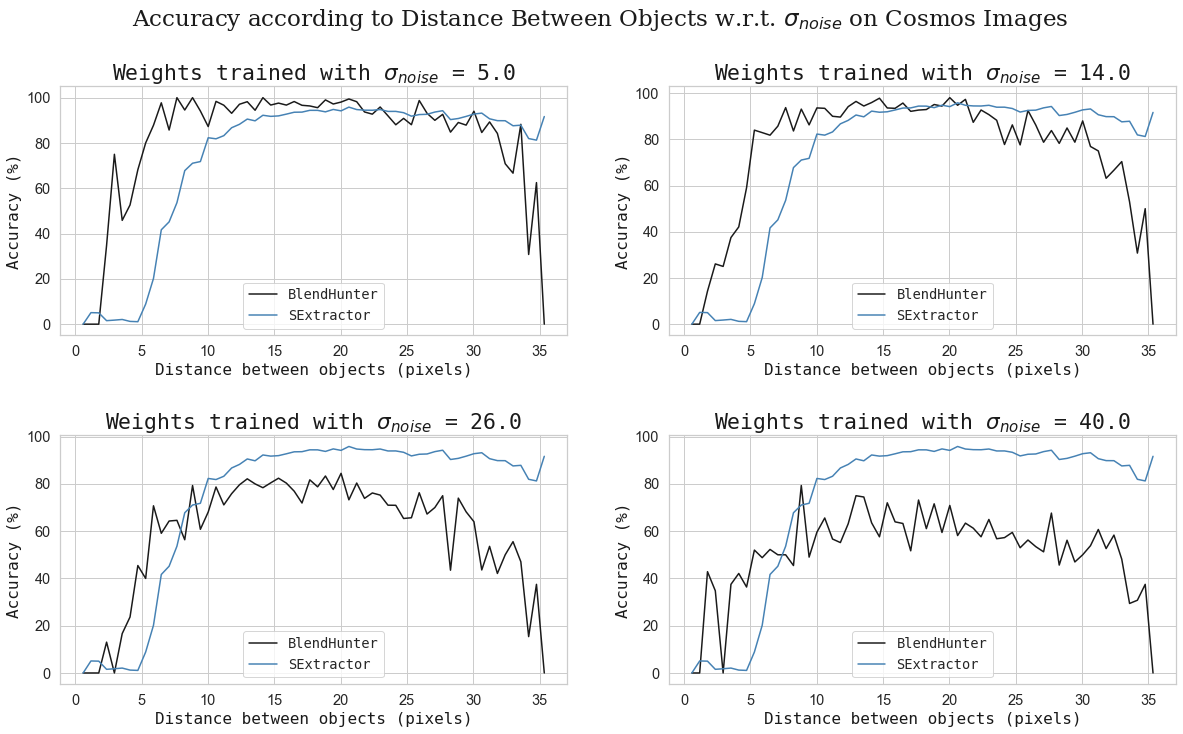

In [255]:
#Seaborn theme
sns.set(context='notebook', style='whitegrid', palette='deep')
#Font dictionnary
font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 16}
#Start plot
fig, ax = plt.subplots(2,2,figsize=(20,11), sharex=False)
#Title
fig.suptitle('Accuracy according to Distance Between Objects w.r.t. $\sigma_{noise}$ on Cosmos Images', 
             fontdict = {'family': 'serif','color':  'k','weight': 'heavy','size': 23}, fontsize=23)
#First subplot 
ax[0,0].set_title('Weights trained with $\sigma_{noise}$ = 5.0', fontdict=font, fontsize=21.5)
ax[0,0].plot(mean_dist_real, (1 - ratios_real[0])*100, color = 'k',label ='BlendHunter')
ax[0,0].plot(mean_dist_sep_real, (1-ratios_sep_real)*100, color = 'steelblue',label ='SExtractor')
ax[0,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,0].tick_params(axis='both', which='major', labelsize=14.5)
ax[0,0].legend(loc='lower center', prop={'family':'monospace', 'size': 13.8})
#Second subplot 
ax[0,1].set_title('Weights trained with $\sigma_{noise}$ = 14.0', fontdict=font, fontsize=21.5)
ax[0,1].plot(mean_dist_real, (1-ratios_real[1])*100, color = 'k',label ='BlendHunter')
ax[0,1].plot(mean_dist_sep_real, (1-ratios_sep_real)*100, color = 'steelblue',label ='SExtractor')
ax[0,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[0,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[0,1].tick_params(axis='both', which='major', labelsize=14.5)
ax[0,1].legend(loc='lower center', prop={'family':'monospace', 'size': 13.8})
#4th subplot 
ax[1,0].set_title('Weights trained with $\sigma_{noise}$ = 26.0', fontdict=font, fontsize=21.5)
ax[1,0].plot(mean_dist_real, (1-ratios_real[3])*100, color = 'k',label ='BlendHunter')
ax[1,0].plot(mean_dist_sep_real, (1-ratios_sep_real)*100, color = 'steelblue',label ='SExtractor')
ax[1,0].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,0].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,0].tick_params(axis='both', which='major', labelsize=14.5)
ax[1,0].legend(loc='lower center', prop={'family':'monospace', 'size': 13.8})

#6th subplot 
ax[1,1].set_title('Weights trained with $\sigma_{noise}$ = 40.0', fontdict=font, fontsize=21.5)
x=ax[1,1].plot(mean_dist_real, (1-ratios_real[5])*100, color = 'k', label ='BlendHunter')
y=ax[1,1].plot(mean_dist_sep_real, (1-ratios_sep_real)*100, color = 'steelblue', label ='SExtractor')
ax[1,1].set_ylabel('Accuracy (%)', fontdict = font)
ax[1,1].set_xlabel('Distance between objects (pixels)', fontdict = font)
ax[1,1].tick_params(axis='both', which='major', labelsize=14.5)
ax[1,1].legend(loc='lower center', prop={'family':'monospace', 'size': 13.8})

#Add legend
plt.subplots_adjust(hspace=.4)
plt.show()